In [1]:
import pandas as pd
from functools import partial
import sys

sys.path.append("../Handlers")

JSON_WRITE_MODE = "overwrite"

import preprocessing

[nltk_data] Downloading package punkt to E:/nltk...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
csv_file = pd.read_csv("./SpamAssassin.csv")

csv_file.head()

,Subject,Date,From,To,Received,Content-Type,Body,Is_spam
0,Re: New Sequences Window,"Thu, 22 Aug 2002 18:26:25 +0700",['Robert Elz <kre@munnari.OZ.AU>'],['Chris Garrigues <cwg-dated-1030377287.06fa6d...,['from localhost (localhost [127.0.0.1])\tby p...,text/plain,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
1,[zzzzteana] RE: Alexander,"Thu, 22 Aug 2002 12:46:18 +0100",['Steve Burt <Steve_Burt@cursor-system.com>'],"['""\'zzzzteana@yahoogroups.com\'"" <zzzzteana@y...",['from localhost (localhost [127.0.0.1])\tby p...,text/plain,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
2,[zzzzteana] Moscow bomber,"Thu, 22 Aug 2002 13:52:38 +0100",['Tim Chapman <timc@2ubh.com>'],['zzzzteana <zzzzteana@yahoogroups.com>'],['from localhost (localhost [127.0.0.1])\tby p...,text/plain,Man Threatens Explosion In Moscow \n\nThursday...,0
3,[IRR] Klez: The Virus That Won't Die,"Thu, 22 Aug 2002 09:15:25 -0400",['Monty Solomon <monty@roscom.com>'],['undisclosed-recipient:;'],['from localhost (localhost [127.0.0.1])\tby p...,text/plain,Klez: The Virus That Won't Die\n \nAlready the...,0
4,Re: Insert signature,"Thu, 22 Aug 2002 23:36:32 +1000",['Tony Nugent <tony@linuxworks.com.au>'],['Exmh Users Mailing List <exmh-users@example....,['from localhost (localhost [127.0.0.1])\tby p...,text/plain,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",0


In [3]:
preprocession = partial(
    preprocessing.preprocess_text,
    remove_numbers=True
)

preprocessed_data = csv_file["Body"].apply(preprocession)
preprocessed_data

0       [date, DATE, TIME, chris, garrigues, messageid...
1       [martin, posted, tassos, papadopoulos, greek, ...
2       [man, threatens, explosion, moscow, thursday, ...
3       [klez, virus, wont, die, already, prolific, vi...
4       [wed, DATE, TIME, ulises, ponce, wrote, hi, co...
                              ...                        
4193    [preferred, nonsmoker, doctor, ordered, case, ...
4194    [dear, subscriber, could, show, way, get, visi...
4195    [midsummer, customer, appreciation, sale, expr...
4196    [attnsirmadan, strictly, confidential, pleased...
4197    [mv, efaeefcdfdcbaPHONENUMefaeefcdfdcba, mv, e...
Name: Body, Length: 4198, dtype: object

In [4]:
from traintest import train_and_evaluate_models, add_to_json_array

metric_results = []

## Stemming + CountVectorizer

In [5]:
spam_assassin_stemming = preprocessed_data.apply(preprocessing.stemming)
spam_assassin_stemming_countvec = preprocessing.vectorizing(spam_assassin_stemming, "countvectorizer")

Threading avaiable
Begin SVC
Begin MultinomialNB
Begin BernoulliNB
Multinomial Naive Bayes begins epoch 5
Bernoulli Naive Bayes begins epoch 5
Multinomial Naive Bayes begins epoch 10
Bernoulli Naive Bayes begins epoch 10
MultinomialNB classification report
BernoulliNB classification report


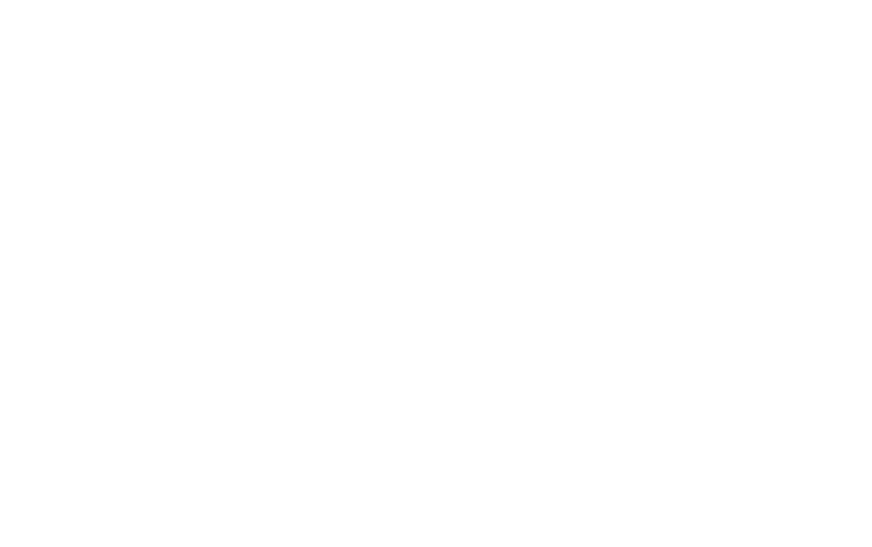

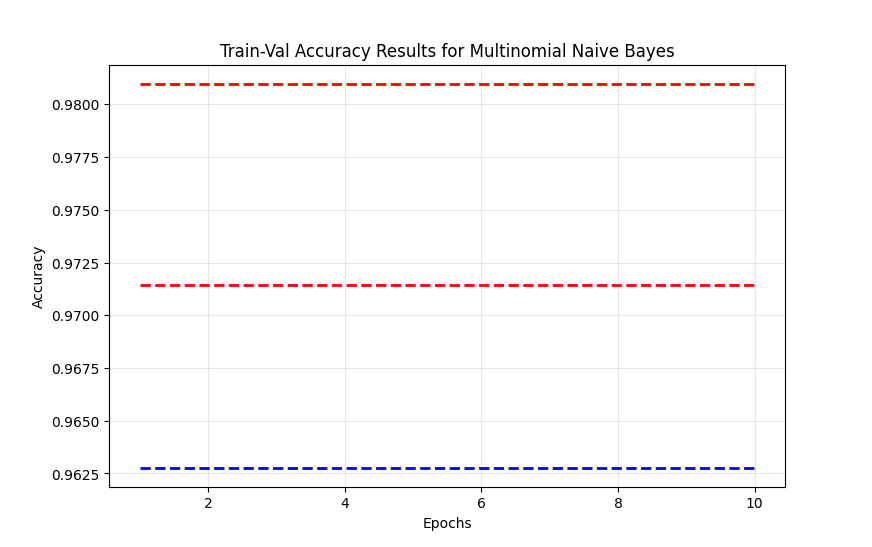

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin RandomForestClassifier
{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9571428571428572, 'weighted_precision': 0.9572555018970748, 'wighted_recall': 0.9571428571428572, 'weighted_f1': 0.9567970448770009, 'macro_precision': 0.9582833852793096, 'macro_recall': 0.9437208222640634, 'macro_f1': 0.9504859710251239, 'roc_auc': 0.9437208222640634}, 'confusion_matrix': array([[278,   5],
       [ 13, 124]], dtype=int64), 'epochs': 10}

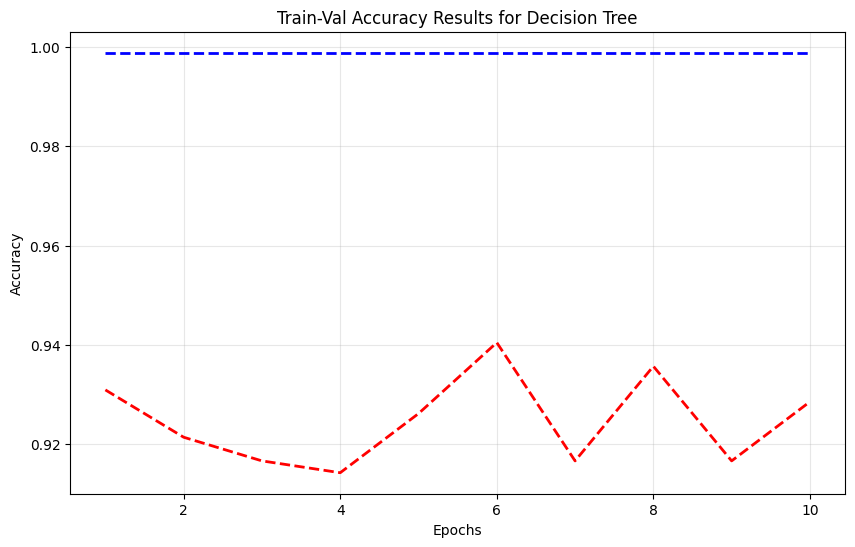

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9428571428571428, 'weighted_precision': 0.9431160917732514, 'wighted_recall': 0.9428571428571428, 'weighted_f1': 0.9429628650720233, 'macro_precision': 0.9336644563352876, 'macro_recall': 0.9368858167186815, 'macro_f1': 0.9352451433857539, 'roc_auc': 0.9368858167186814}, 'confusion_matrix': array([[270,  13],
       [ 11, 126]], dtype=int64), 'epochs': 10}


Begin AdaBoostClassifier
AdaBoost begins epoch 5
Random Forest begins epoch 5
SVM begins epoch 5
AdaBoost begins epoch 10
AdaBoostClassifier classification report


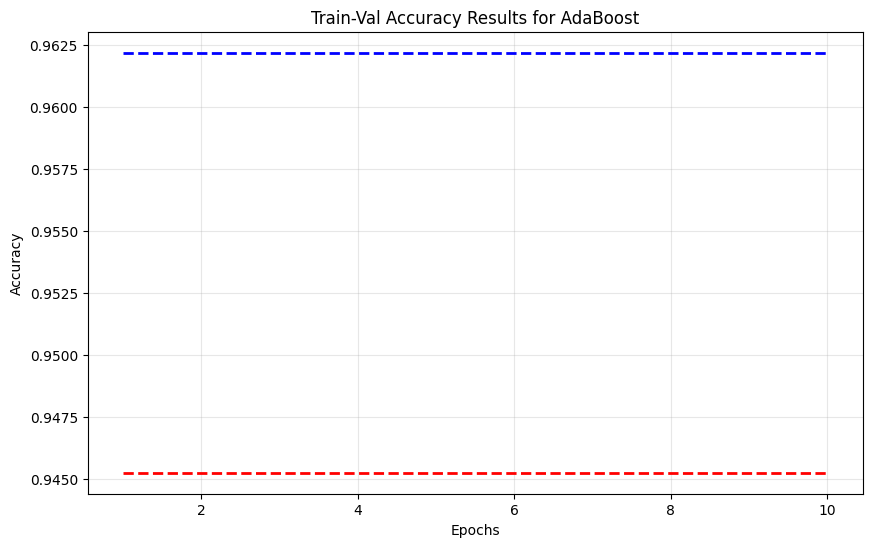

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.9428571428571428, 'weighted_precision': 0.9426171546301503, 'wighted_recall': 0.9428571428571428, 'weighted_f1': 0.9425171843082291, 'macro_precision': 0.9396972978684064, 'macro_recall': 0.9293544143818834, 'macro_f1': 0.934244859617994, 'roc_auc': 0.9293544143818833}, 'confusion_matrix': array([[274,   9],
       [ 15, 122]], dtype=int64), 'epochs': 10}


Begin LogisticRegression
Logistic Regression begins epoch 5
Logistic Regression begins epoch 10
LogisticRegression classification report


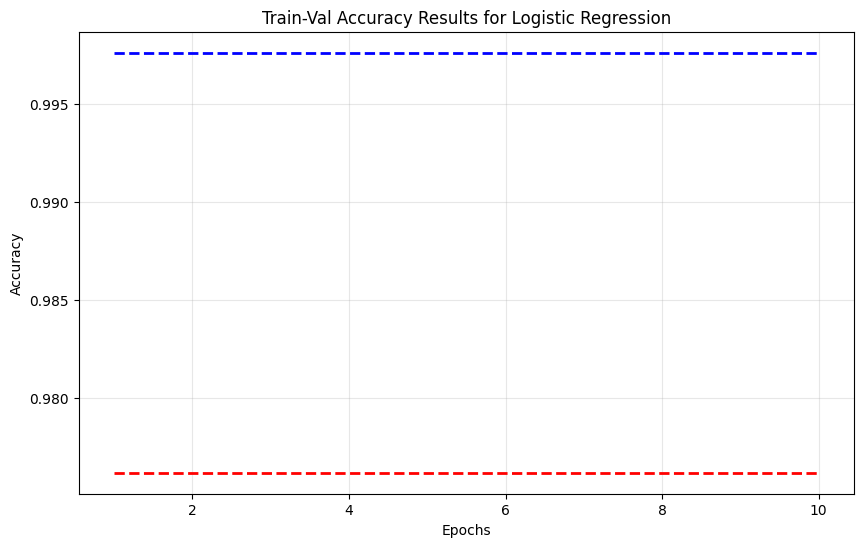

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9857142857142858, 'weighted_precision': 0.9857105727281167, 'wighted_recall': 0.9857142857142858, 'weighted_f1': 0.9856869156113148, 'macro_precision': 0.9855750487329434, 'macro_recall': 0.981867890949421, 'macro_f1': 0.9836888980944489, 'roc_auc': 0.981867890949421}, 'confusion_matrix': array([[281,   2],
       [  4, 133]], dtype=int64), 'epochs': 10}


Begin KNeighborsClassifier
K-nearest Neighbors begins epoch 5
Random Forest begins epoch 10
K-nearest Neighbors begins epoch 10
KNeighborsClassifier classification report


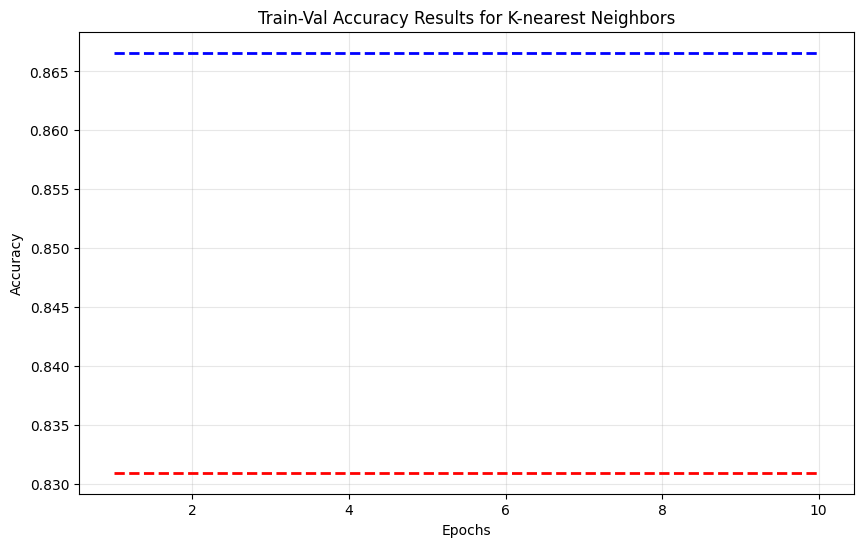

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.8214285714285714, 'weighted_precision': 0.8715093494932716, 'wighted_recall': 0.8214285714285714, 'weighted_f1': 0.8269642762515423, 'macro_precision': 0.8152647833590698, 'macro_recall': 0.858076913156741, 'macro_f1': 0.8145302315722538, 'roc_auc': 0.858076913156741}, 'confusion_matrix': array([[213,  70],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin SGDClassifier
Stochastic Gradient Descent begins epoch 5
Stochastic Gradient Descent begins epoch 10
SGDClassifier classification report


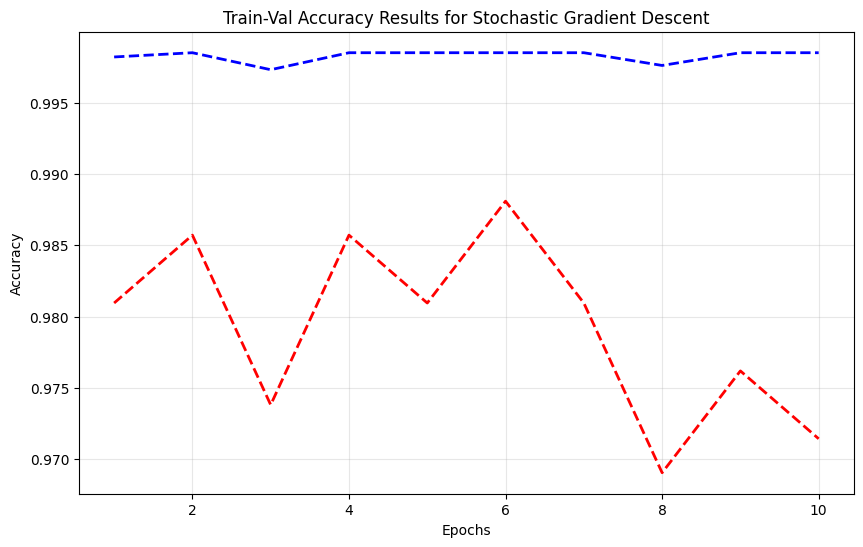

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9738095238095238, 'weighted_precision': 0.9737711293681444, 'wighted_recall': 0.9738095238095238, 'weighted_f1': 0.9737336015087492, 'macro_precision': 0.9728368646279094, 'macro_recall': 0.9673854169353382, 'macro_f1': 0.9700387162043853, 'roc_auc': 0.9673854169353382}, 'confusion_matrix': array([[279,   4],
       [  7, 130]], dtype=int64), 'epochs': 10}


Begin Perceptron
Perceptron begins epoch 5
Perceptron begins epoch 10
Perceptron classification report


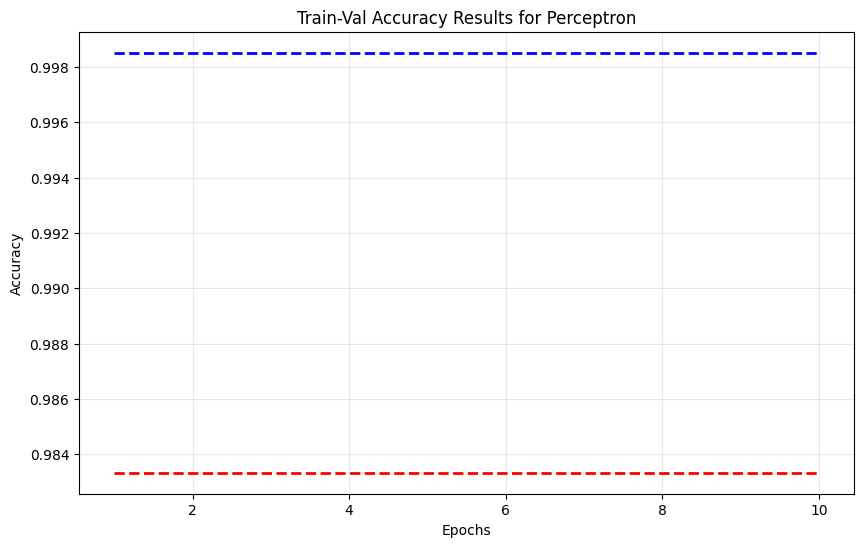

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9715836481805912, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9714814325360117, 'macro_precision': 0.9659233467318671, 'macro_recall': 0.9693843336514405, 'macro_f1': 0.967622571692877, 'roc_auc': 0.9693843336514406}, 'confusion_matrix': array([[276,   7],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin PassiveAggressiveClassifier
Passive-Aggressive begins epoch 5
Passive-Aggressive begins epoch 10
PassiveAggressiveClassifier classification report


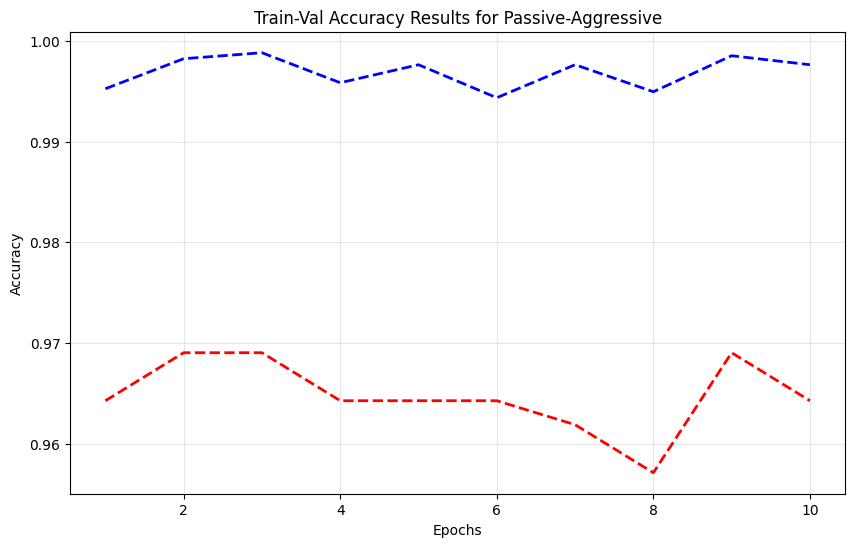

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9642857142857143, 'weighted_precision': 0.9642302343472601, 'wighted_recall': 0.9642857142857143, 'weighted_f1': 0.964251797585131, 'macro_precision': 0.9601801988400994, 'macro_recall': 0.9584354285419514, 'macro_f1': 0.9592999592999594, 'roc_auc': 0.9584354285419515}, 'confusion_matrix': array([[276,   7],
       [  8, 129]], dtype=int64), 'epochs': 10}


Begin MLPClassifier
RandomForestClassifier classification report


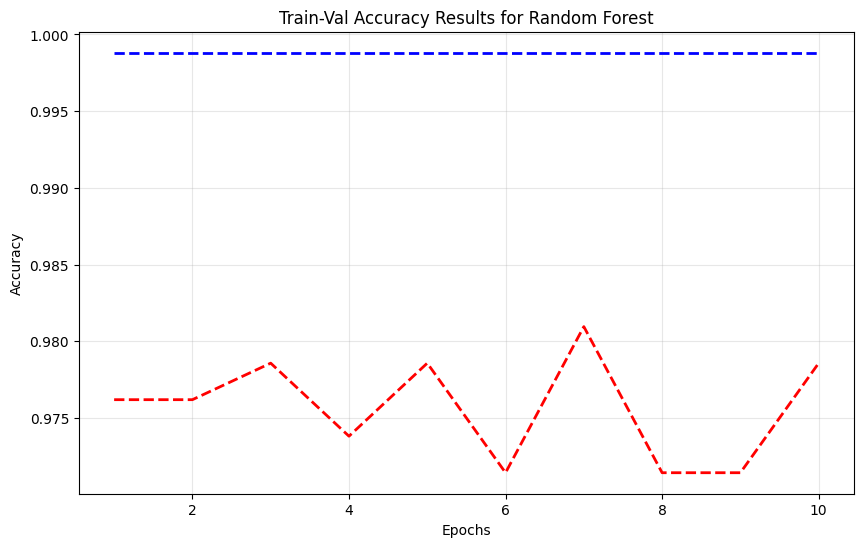

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9880952380952381, 'weighted_precision': 0.9880853749950684, 'wighted_recall': 0.9880952380952381, 'weighted_f1': 0.9880839325283769, 'macro_precision': 0.9873653686826844, 'macro_recall': 0.9855175259859172, 'macro_f1': 0.986433319766653, 'roc_auc': 0.9855175259859172}, 'confusion_matrix': array([[281,   2],
       [  3, 134]], dtype=int64), 'epochs': 10}


Begin ExtraTreesClassifier
SVM begins epoch 10
SVC classification report


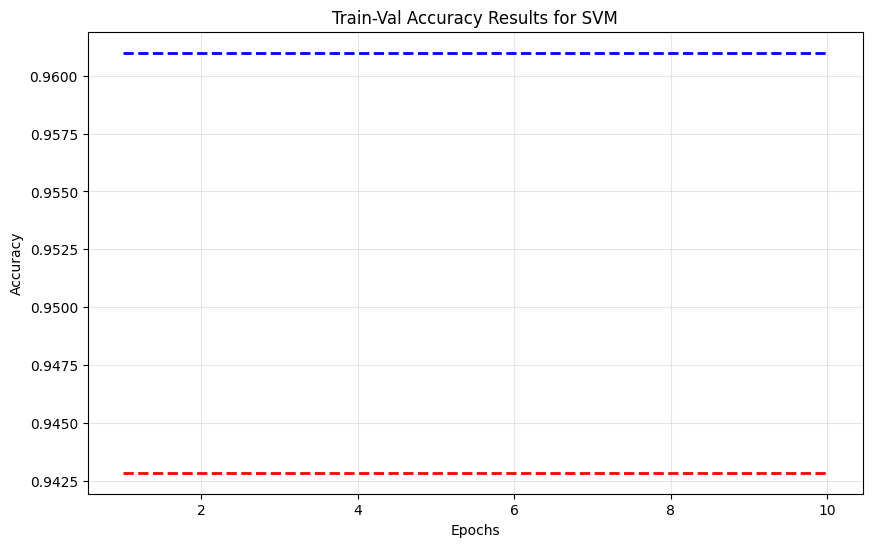

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9285714285714286, 'weighted_precision': 0.9330655204441611, 'wighted_recall': 0.9285714285714286, 'weighted_f1': 0.926395721758625, 'macro_precision': 0.9456835476252952, 'macro_recall': 0.8942766500735085, 'macro_f1': 0.9141782911944202, 'roc_auc': 0.8942766500735085}, 'confusion_matrix': array([[281,   2],
       [ 28, 109]], dtype=int64), 'epochs': 10}


Begin XGBClassifier
XGBoost Classifier begins epoch 5
XGBoost Classifier begins epoch 10
XGBClassifier classification report


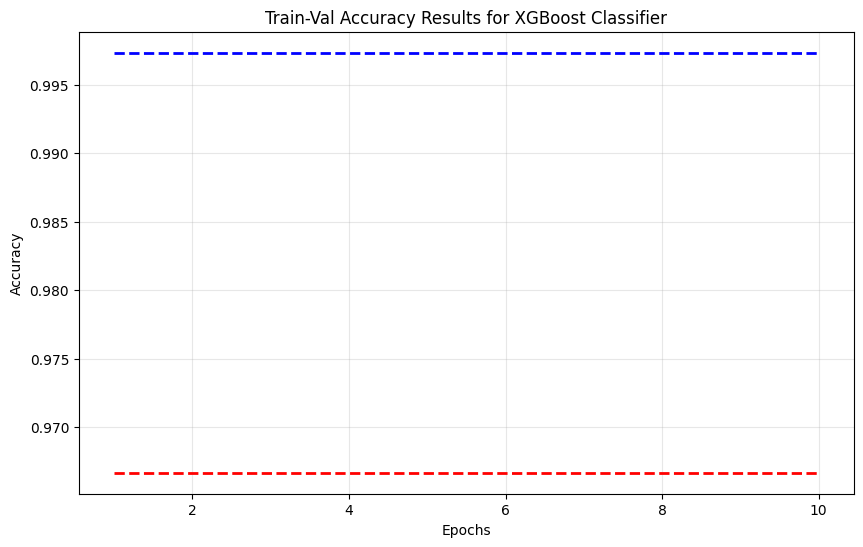

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'XGBoost Classifier', 'type': 'normal', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9714285714285714, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9714285714285714, 'macro_precision': 0.967501483067241, 'macro_recall': 0.967501483067241, 'macro_f1': 0.967501483067241, 'roc_auc': 0.9675014830672409}, 'confusion_matrix': array([[277,   6],
       [  6, 131]], dtype=int64), 'epochs': 10}


Extra Trees Classifier begins epoch 5
Multi-layer Perceptron begins epoch 5
Extra Trees Classifier begins epoch 10
ExtraTreesClassifier classification report


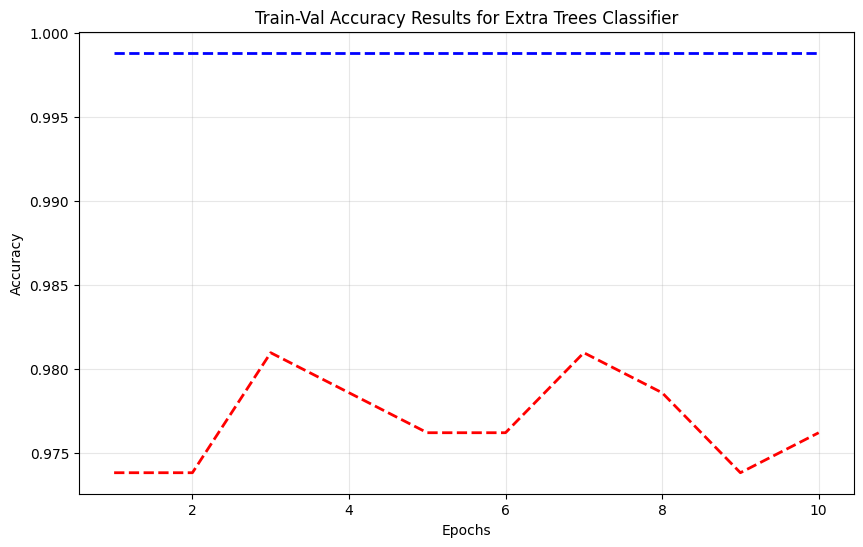

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Extra Trees Classifier', 'type': 'normal', 'metrics': {'accuracy': 0.9833333333333333, 'weighted_precision': 0.9834911616161616, 'wighted_recall': 0.9833333333333333, 'weighted_f1': 0.9832514100569232, 'macro_precision': 0.9857954545454546, 'macro_recall': 0.9763354053287251, 'macro_f1': 0.9808592503857447, 'roc_auc': 0.9763354053287251}, 'confusion_matrix': array([[282,   1],
       [  6, 131]], dtype=int64), 'epochs': 10}


Multi-layer Perceptron begins epoch 10
MLPClassifier classification report


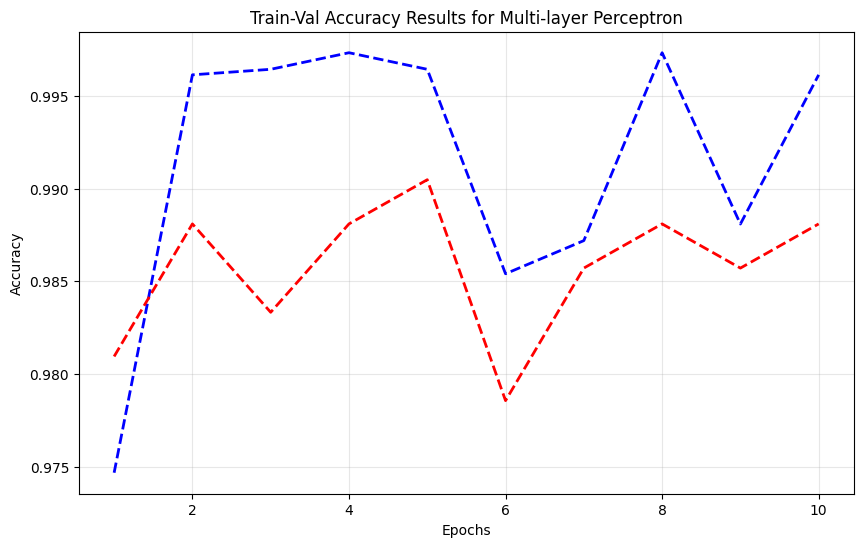

{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9809523809523809, 'weighted_precision': 0.9814760268368515, 'wighted_recall': 0.9809523809523809, 'weighted_f1': 0.9807986866120003, 'macro_precision': 0.9862542955326461, 'macro_recall': 0.9708029197080292, 'macro_f1': 0.977993764900055, 'roc_auc': 0.9708029197080292}, 'confusion_matrix': array([[283,   0],
       [  8, 129]], dtype=int64), 'epochs': 10}




In [6]:
%reload_ext autoreload
%autoreload 2

train_and_evaluate_models(
    spam_assassin_stemming_countvec, 
    csv_file["Is_spam"],
    "spam_assassin_stemming_countvec",
    metric_results,
    mode="epochs",
    test_size=0.1,
    valid_size=0.1
)

del spam_assassin_stemming_countvec

## Stemming + TF-IDF Vectorizer

In [7]:
spam_assassin_stemming_tfidf = preprocessing.vectorizing(spam_assassin_stemming, "tfidf")
del spam_assassin_stemming

Threading avaiable
Begin SVC
Begin MultinomialNB
Begin BernoulliNB
Multinomial Naive Bayes begins epoch 5
Bernoulli Naive Bayes begins epoch 5
Multinomial Naive Bayes begins epoch 10
MultinomialNB classification report
Bernoulli Naive Bayes begins epoch 10


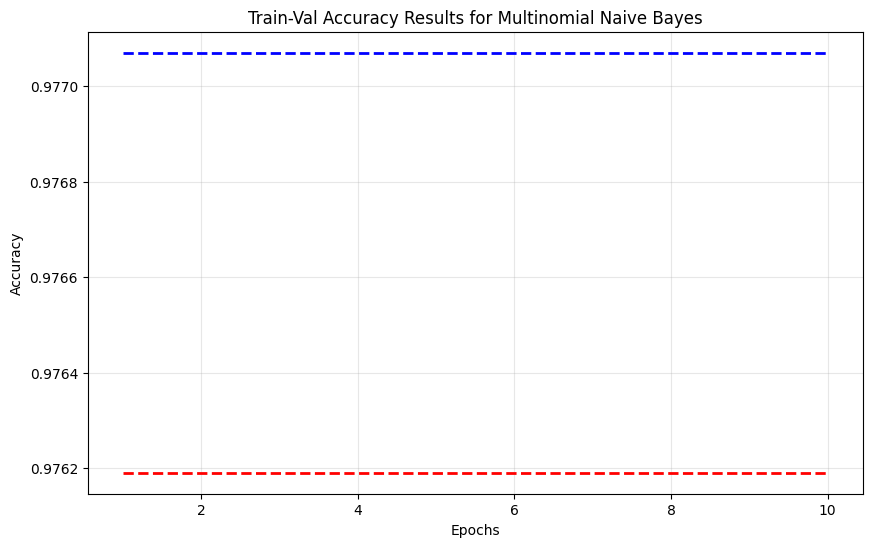

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9571428571428572, 'weighted_precision': 0.9575306073088985, 'wighted_recall': 0.9571428571428572, 'weighted_f1': 0.9567031926406926, 'macro_precision': 0.9603611835210017, 'macro_recall': 0.9418379716798638, 'macro_f1': 0.9502840909090908, 'roc_auc': 0.9418379716798638}, 'confusion_matrix': array([[279,   4],
       [ 14, 123]], dtype=int64), 'epochs': 10}


Begin RandomForestClassifier
BernoulliNB classification report


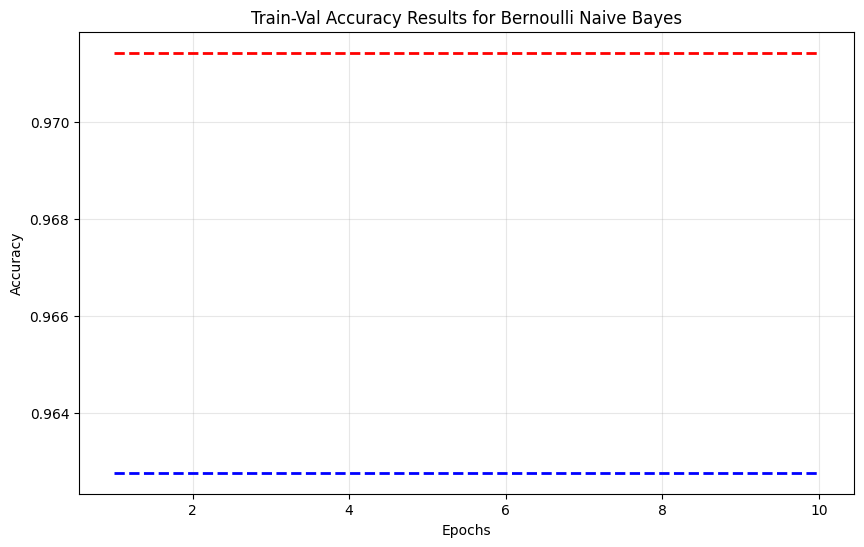

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin DecisionTreeClassifier
Decision Tree begins epoch 5
Decision Tree begins epoch 10
DecisionTreeClassifier classification report


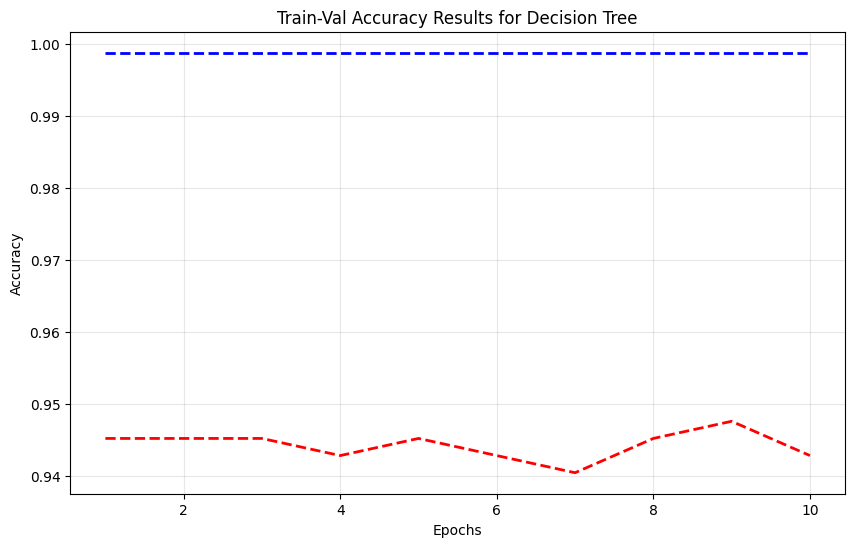

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9380952380952381, 'weighted_precision': 0.9380952380952381, 'wighted_recall': 0.9380952380952381, 'weighted_f1': 0.9380952380952381, 'macro_precision': 0.9295865466456887, 'macro_recall': 0.9295865466456887, 'macro_f1': 0.9295865466456887, 'roc_auc': 0.9295865466456887}, 'confusion_matrix': array([[270,  13],
       [ 13, 124]], dtype=int64), 'epochs': 10}


Begin AdaBoostClassifier
Random Forest begins epoch 5
AdaBoost begins epoch 5
SVM begins epoch 5
Random Forest begins epoch 10
RandomForestClassifier classification report


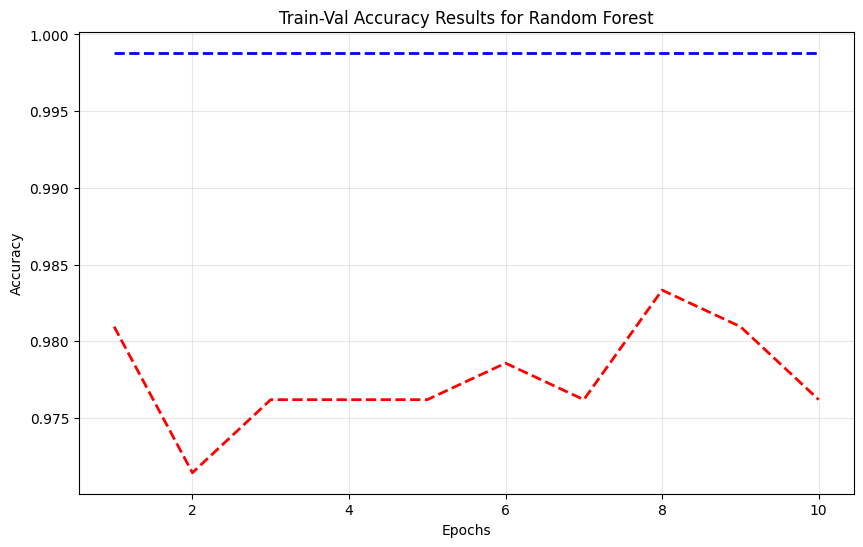

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9833333333333333, 'weighted_precision': 0.9833515986501062, 'wighted_recall': 0.9833333333333333, 'weighted_f1': 0.9832850191419313, 'macro_precision': 0.983796054691577, 'macro_recall': 0.9782182559129247, 'macro_f1': 0.9809337284936998, 'roc_auc': 0.9782182559129247}, 'confusion_matrix': array([[281,   2],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin LogisticRegression
AdaBoost begins epoch 10
Logistic Regression begins epoch 5
AdaBoostClassifier classification report


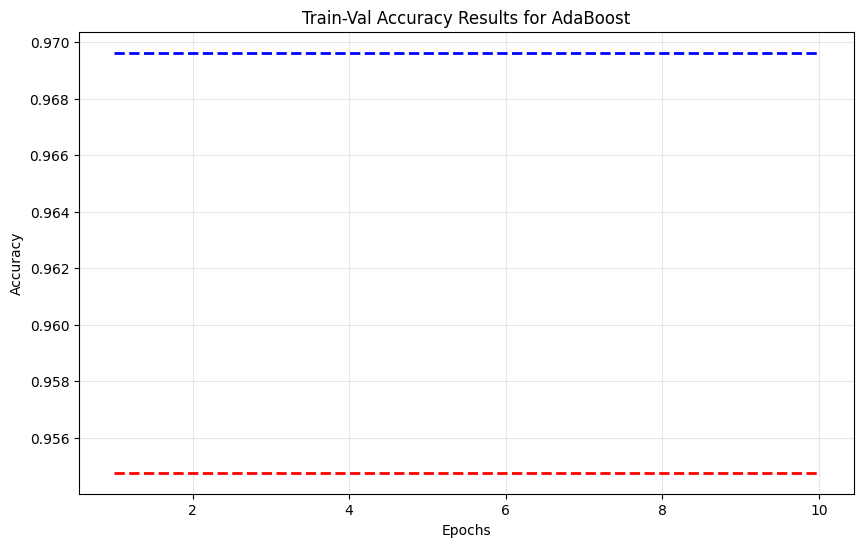

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.9476190476190476, 'weighted_precision': 0.9474059713744291, 'wighted_recall': 0.9476190476190476, 'weighted_f1': 0.9474148333797456, 'macro_precision': 0.9435173299101411, 'macro_recall': 0.9366536844548761, 'macro_f1': 0.9399610136452241, 'roc_auc': 0.9366536844548761}, 'confusion_matrix': array([[274,   9],
       [ 13, 124]], dtype=int64), 'epochs': 10}


Begin KNeighborsClassifier
Logistic Regression begins epoch 10
LogisticRegression classification report


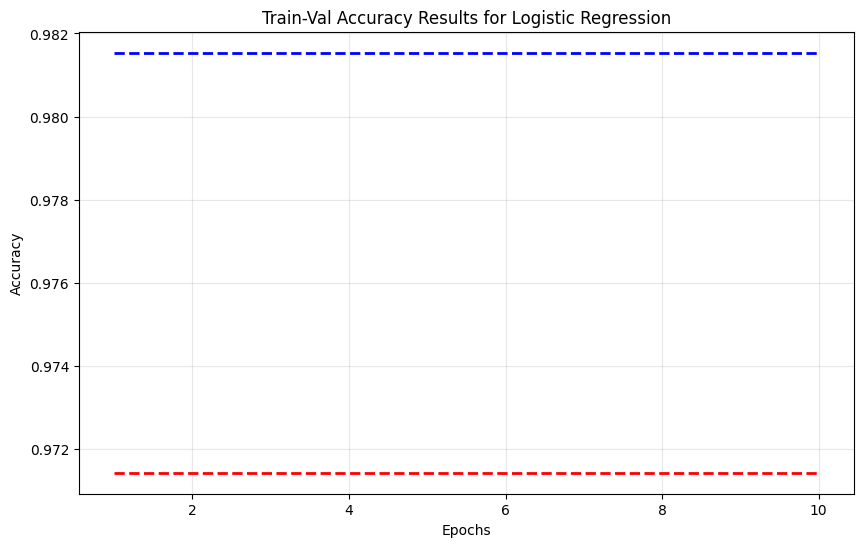

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9547619047619048, 'weighted_precision': 0.9568531746031746, 'wighted_recall': 0.9547619047619048, 'weighted_f1': 0.9539252637336479, 'macro_precision': 0.9658333333333333, 'macro_recall': 0.9325397848907688, 'macro_f1': 0.946739993726265, 'roc_auc': 0.9325397848907688}, 'confusion_matrix': array([[282,   1],
       [ 18, 119]], dtype=int64), 'epochs': 10}


Begin SGDClassifier
Stochastic Gradient Descent begins epoch 5
Stochastic Gradient Descent begins epoch 10
SGDClassifier classification report


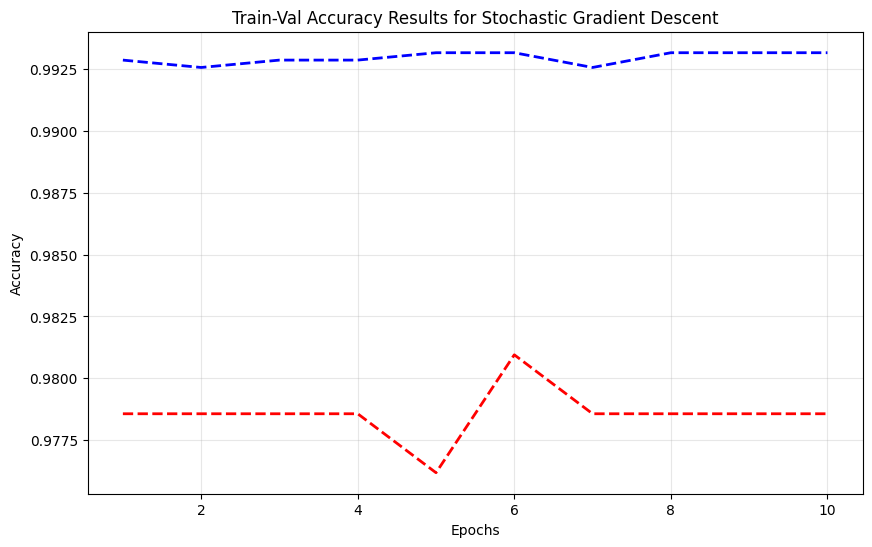

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.969047619047619, 'weighted_precision': 0.9695200383235486, 'wighted_recall': 0.969047619047619, 'weighted_f1': 0.9687642486034611, 'macro_precision': 0.9733518835616438, 'macro_recall': 0.9563204456939465, 'macro_f1': 0.9641673502871206, 'roc_auc': 0.9563204456939464}, 'confusion_matrix': array([[281,   2],
       [ 11, 126]], dtype=int64), 'epochs': 10}


Begin Perceptron
Perceptron begins epoch 5
Perceptron begins epoch 10
Perceptron classification report


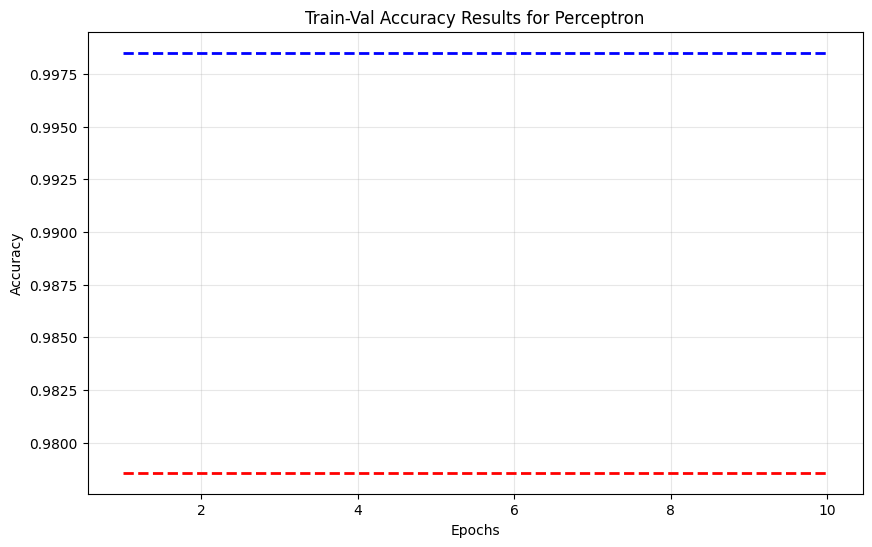

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9761904761904762, 'weighted_precision': 0.9761904761904762, 'wighted_recall': 0.9761904761904762, 'weighted_f1': 0.9761904761904762, 'macro_precision': 0.9729179025560342, 'macro_recall': 0.9729179025560342, 'macro_f1': 0.9729179025560342, 'roc_auc': 0.9729179025560343}, 'confusion_matrix': array([[278,   5],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin PassiveAggressiveClassifier
Passive-Aggressive begins epoch 5
Passive-Aggressive begins epoch 10
PassiveAggressiveClassifier classification report


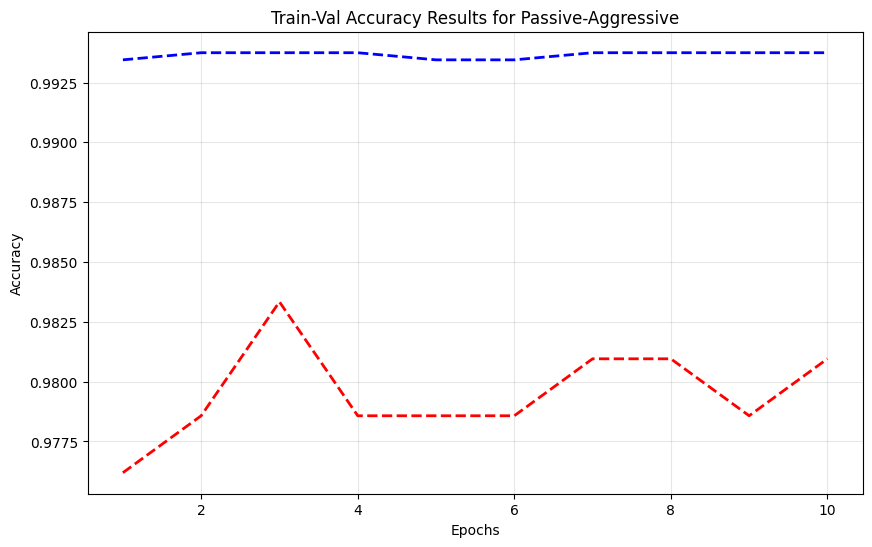

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9738095238095238, 'weighted_precision': 0.9743759682811481, 'wighted_recall': 0.9738095238095238, 'weighted_f1': 0.9735697488183132, 'macro_precision': 0.9789704623287672, 'macro_recall': 0.9617368651827396, 'macro_f1': 0.9696800656275635, 'roc_auc': 0.9617368651827396}, 'confusion_matrix': array([[282,   1],
       [ 10, 127]], dtype=int64), 'epochs': 10}


Begin MLPClassifier
SVM begins epoch 10
K-nearest Neighbors begins epoch 5
SVC classification report


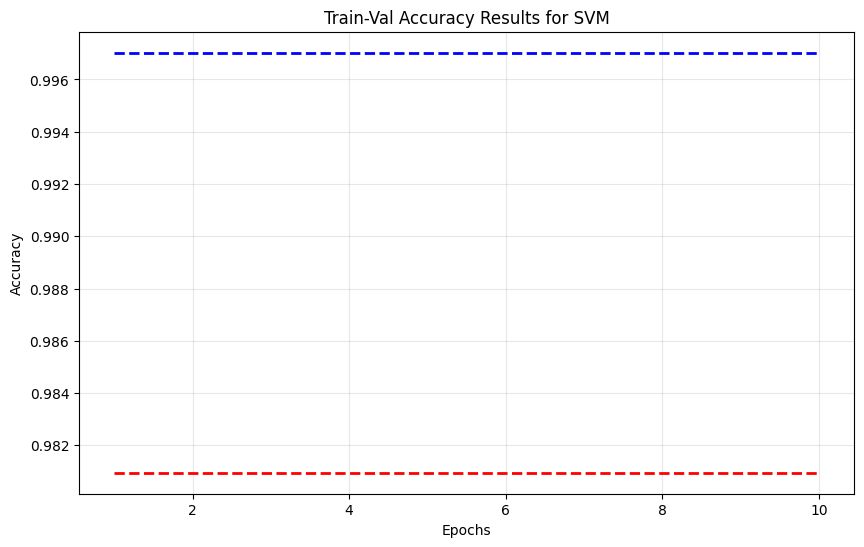

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9738095238095238, 'weighted_precision': 0.9747894395853579, 'wighted_recall': 0.9738095238095238, 'weighted_f1': 0.9735114634845113, 'macro_precision': 0.9812925170068028, 'macro_recall': 0.9598540145985401, 'macro_f1': 0.9695553900798017, 'roc_auc': 0.9598540145985401}, 'confusion_matrix': array([[283,   0],
       [ 11, 126]], dtype=int64), 'epochs': 10}


Begin ExtraTreesClassifier
Multi-layer Perceptron begins epoch 5
Extra Trees Classifier begins epoch 5
K-nearest Neighbors begins epoch 10
KNeighborsClassifier classification report


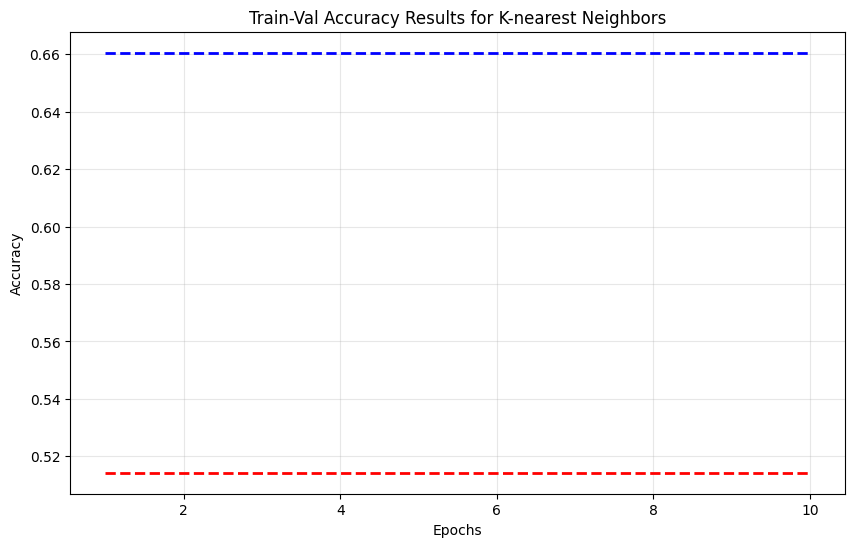

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.5261904761904762, 'weighted_precision': 0.8068098072562359, 'wighted_recall': 0.5261904761904762, 'weighted_f1': 0.4974028717200887, 'macro_precision': 0.7038690476190477, 'macro_recall': 0.6484098939929328, 'macro_f1': 0.5185234257536393, 'roc_auc': 0.6484098939929328}, 'confusion_matrix': array([[ 84, 199],
       [  0, 137]], dtype=int64), 'epochs': 10}


Begin XGBClassifier
Extra Trees Classifier begins epoch 10
XGBoost Classifier begins epoch 5
ExtraTreesClassifier classification report


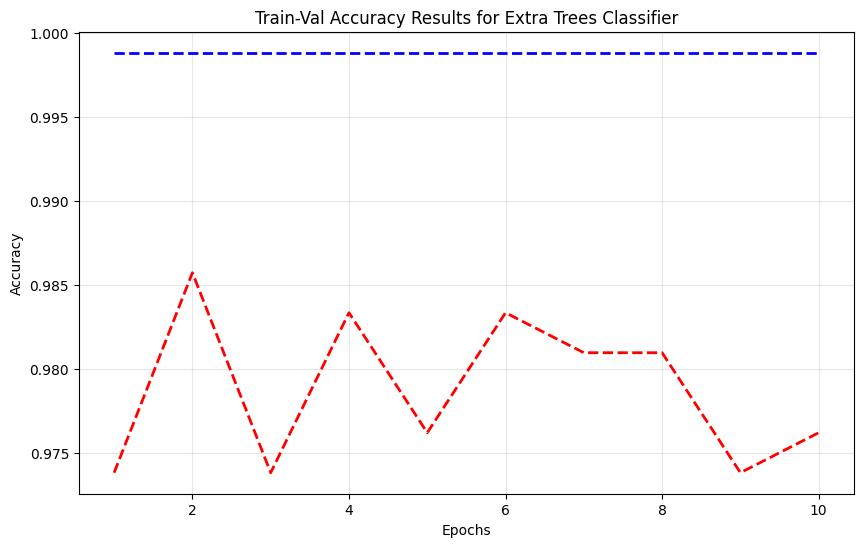

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Extra Trees Classifier', 'type': 'normal', 'metrics': {'accuracy': 0.9857142857142858, 'weighted_precision': 0.9860108749382106, 'wighted_recall': 0.9857142857142858, 'weighted_f1': 0.9856292960770572, 'macro_precision': 0.9896193771626298, 'macro_recall': 0.9781021897810219, 'macro_f1': 0.9835612149044985, 'roc_auc': 0.9781021897810219}, 'confusion_matrix': array([[283,   0],
       [  6, 131]], dtype=int64), 'epochs': 10}


XGBoost Classifier begins epoch 10
XGBClassifier classification report


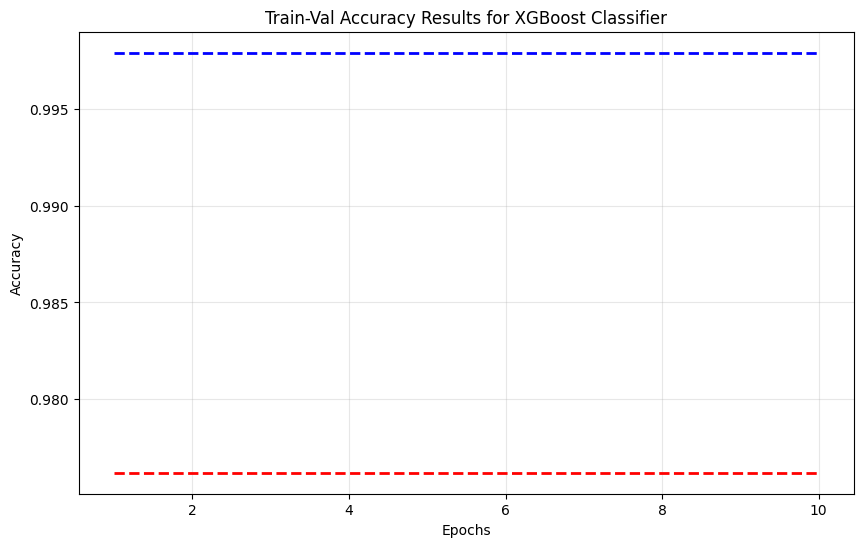

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'XGBoost Classifier', 'type': 'normal', 'metrics': {'accuracy': 0.9738095238095238, 'weighted_precision': 0.9737722906063834, 'wighted_recall': 0.9738095238095238, 'weighted_f1': 0.9737846515624293, 'macro_precision': 0.9710542667771334, 'macro_recall': 0.9692682675195379, 'macro_f1': 0.9701533034866369, 'roc_auc': 0.9692682675195379}, 'confusion_matrix': array([[278,   5],
       [  6, 131]], dtype=int64), 'epochs': 10}


Multi-layer Perceptron begins epoch 10
MLPClassifier classification report


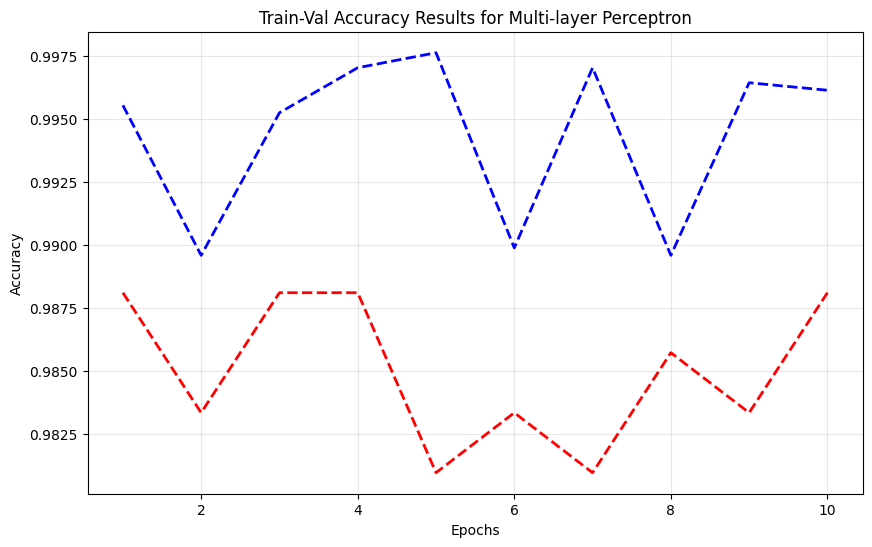

{'dataset': 'spam_assassin_stemmed_tfidf', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9904761904761905, 'weighted_precision': 0.9906089264974282, 'wighted_recall': 0.9904761904761905, 'weighted_f1': 0.9904390606144992, 'macro_precision': 0.9930313588850175, 'macro_recall': 0.9854014598540146, 'macro_f1': 0.989083820662768, 'roc_auc': 0.9854014598540146}, 'confusion_matrix': array([[283,   0],
       [  4, 133]], dtype=int64), 'epochs': 10}




In [8]:
train_and_evaluate_models(
    spam_assassin_stemming_tfidf, 
    csv_file["Is_spam"], 
    "spam_assassin_stemmed_tfidf",
    metric_results,
    mode="epochs",
    test_size=0.1,
    valid_size=0.1
)

del spam_assassin_stemming_tfidf

## Lemmatizing + CountVectorizer

In [9]:
spam_assassin_lemmatizing = preprocessed_data.apply(preprocessing.lemmatizing)
spam_assassin_lemmatizing_countvec = preprocessing.vectorizing(spam_assassin_lemmatizing, "countvectorizer")

Threading avaiable
Begin SVC
Begin MultinomialNB
Begin BernoulliNB
Multinomial Naive Bayes begins epoch 5
Bernoulli Naive Bayes begins epoch 5
Multinomial Naive Bayes begins epoch 10
MultinomialNB classification report
Bernoulli Naive Bayes begins epoch 10


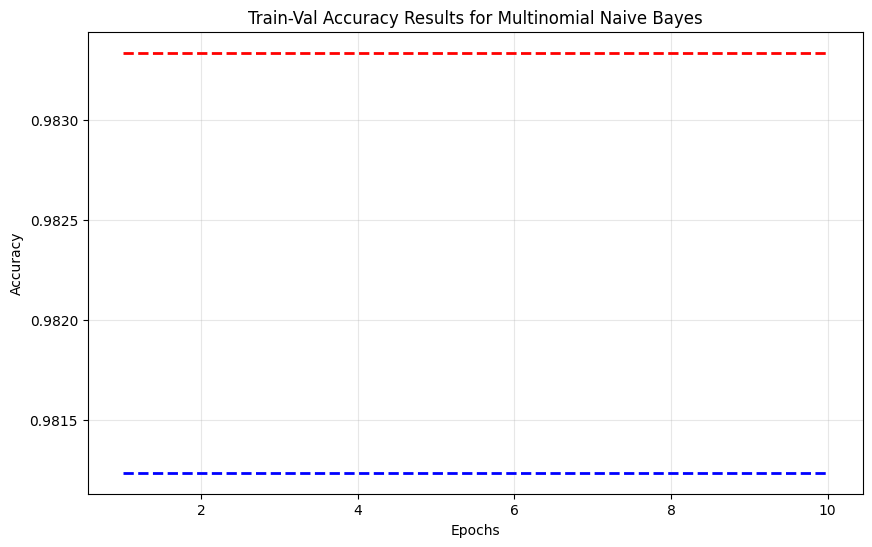

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9595238095238096, 'weighted_precision': 0.9598081784083496, 'wighted_recall': 0.9595238095238096, 'weighted_f1': 0.9591532481737567, 'macro_precision': 0.9621147260273972, 'macro_recall': 0.9454876067163602, 'macro_f1': 0.9531419196062346, 'roc_auc': 0.9454876067163601}, 'confusion_matrix': array([[279,   4],
       [ 13, 124]], dtype=int64), 'epochs': 10}


Begin RandomForestClassifier
BernoulliNB classification report


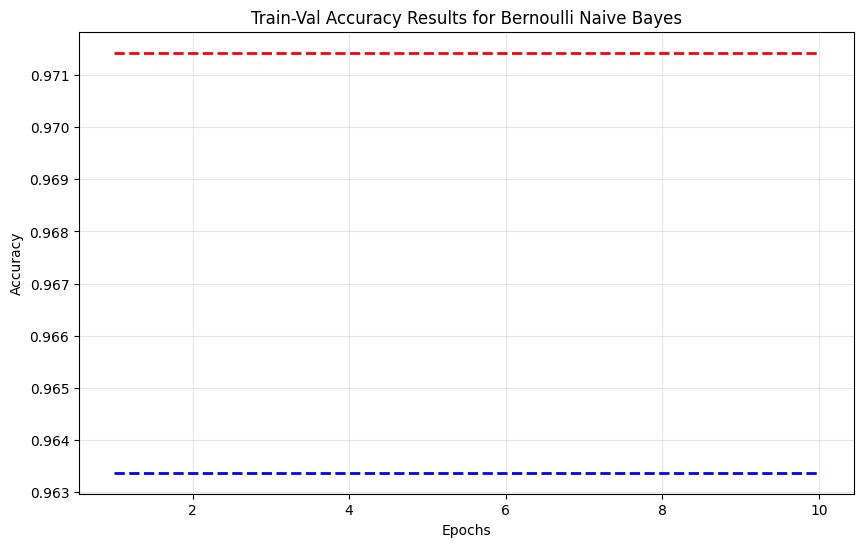

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin DecisionTreeClassifier
Decision Tree begins epoch 5
Decision Tree begins epoch 10
DecisionTreeClassifier classification report


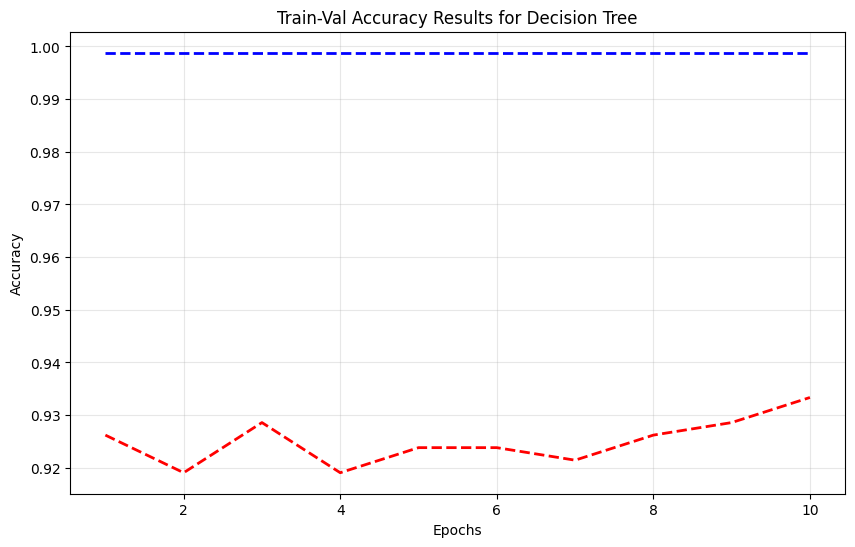

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9476190476190476, 'weighted_precision': 0.9476190476190476, 'wighted_recall': 0.9476190476190476, 'weighted_f1': 0.9476190476190476, 'macro_precision': 0.9404193856232751, 'macro_recall': 0.9404193856232751, 'macro_f1': 0.9404193856232751, 'roc_auc': 0.9404193856232751}, 'confusion_matrix': array([[272,  11],
       [ 11, 126]], dtype=int64), 'epochs': 10}


Begin AdaBoostClassifier
AdaBoost begins epoch 5
Random Forest begins epoch 5
SVM begins epoch 5
AdaBoost begins epoch 10
AdaBoostClassifier classification report


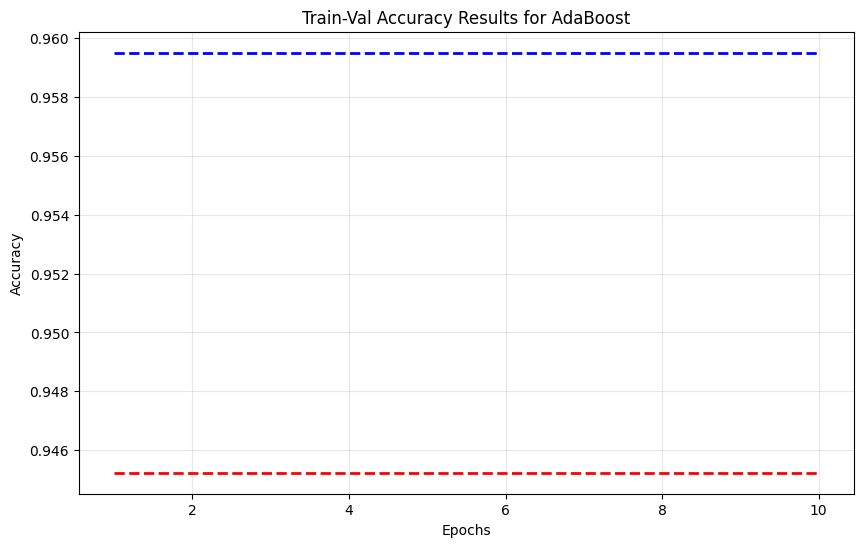

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9403844585779517, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9399312473143482, 'macro_precision': 0.939640410958904, 'macro_recall': 0.9238219287611875, 'macro_f1': 0.9310910582444627, 'roc_auc': 0.9238219287611875}, 'confusion_matrix': array([[275,   8],
       [ 17, 120]], dtype=int64), 'epochs': 10}


Begin LogisticRegression
Logistic Regression begins epoch 5
Random Forest begins epoch 10
Logistic Regression begins epoch 10
LogisticRegression classification report


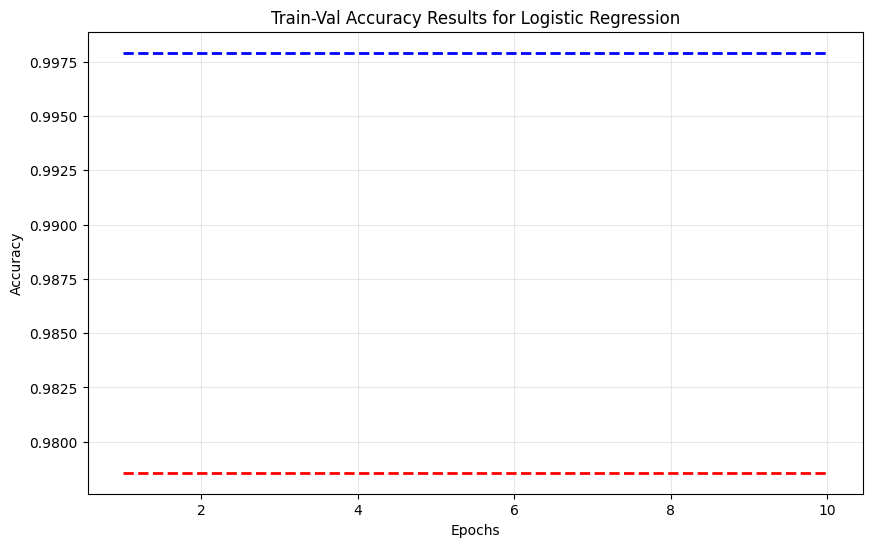

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9857142857142858, 'weighted_precision': 0.9857105727281167, 'wighted_recall': 0.9857142857142858, 'weighted_f1': 0.9856869156113148, 'macro_precision': 0.9855750487329434, 'macro_recall': 0.981867890949421, 'macro_f1': 0.9836888980944489, 'roc_auc': 0.981867890949421}, 'confusion_matrix': array([[281,   2],
       [  4, 133]], dtype=int64), 'epochs': 10}


Begin KNeighborsClassifier
K-nearest Neighbors begins epoch 5
RandomForestClassifier classification report


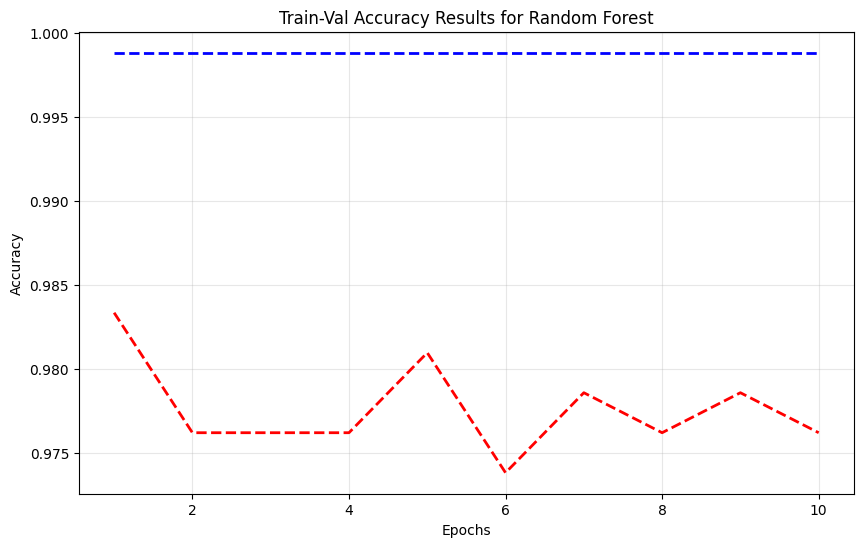

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9785714285714285, 'weighted_precision': 0.9785613640091253, 'wighted_recall': 0.9785714285714285, 'weighted_f1': 0.9785093103253403, 'macro_precision': 0.9783164596597433, 'macro_recall': 0.9728018364241315, 'macro_f1': 0.9754862223490425, 'roc_auc': 0.9728018364241315}, 'confusion_matrix': array([[280,   3],
       [  6, 131]], dtype=int64), 'epochs': 10}


Begin SGDClassifier
Stochastic Gradient Descent begins epoch 5
Stochastic Gradient Descent begins epoch 10
SGDClassifier classification report


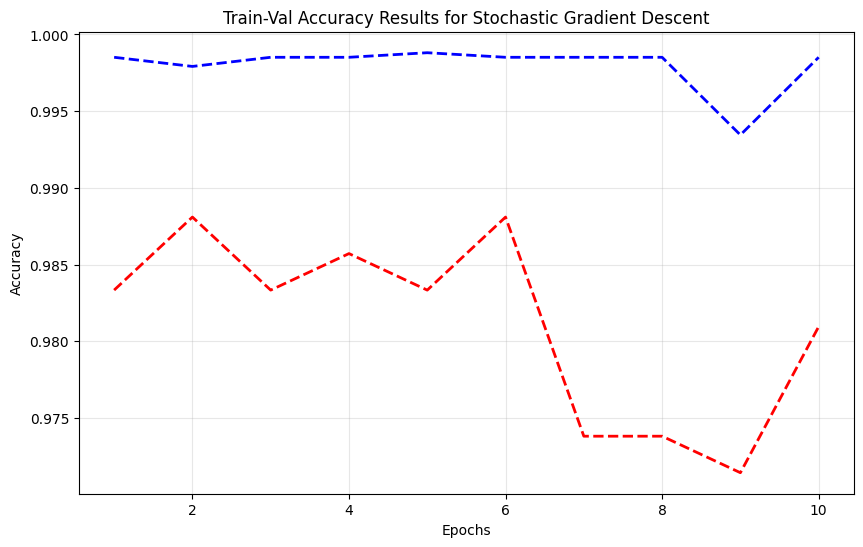

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9761904761904762, 'weighted_precision': 0.9761904761904762, 'wighted_recall': 0.9761904761904762, 'weighted_f1': 0.9761904761904762, 'macro_precision': 0.9729179025560342, 'macro_recall': 0.9729179025560342, 'macro_f1': 0.9729179025560342, 'roc_auc': 0.9729179025560343}, 'confusion_matrix': array([[278,   5],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin Perceptron
Perceptron begins epoch 5
Perceptron begins epoch 10
Perceptron classification report


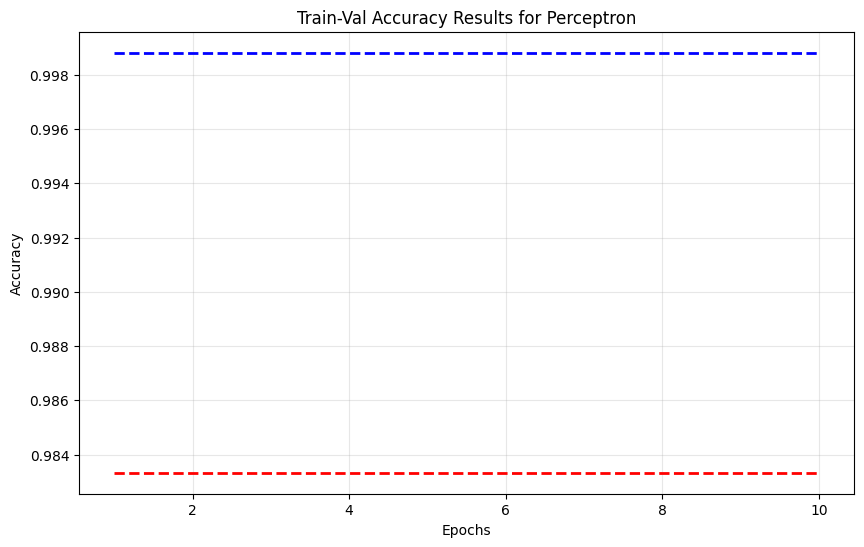

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9738095238095238, 'weighted_precision': 0.9738708280105135, 'wighted_recall': 0.9738095238095238, 'weighted_f1': 0.9738339654445849, 'macro_precision': 0.9693956213382671, 'macro_recall': 0.9711511181037373, 'macro_f1': 0.9702654867256637, 'roc_auc': 0.9711511181037373}, 'confusion_matrix': array([[277,   6],
       [  5, 132]], dtype=int64), 'epochs': 10}


Begin PassiveAggressiveClassifier
Passive-Aggressive begins epoch 5
Passive-Aggressive begins epoch 10
PassiveAggressiveClassifier classification report


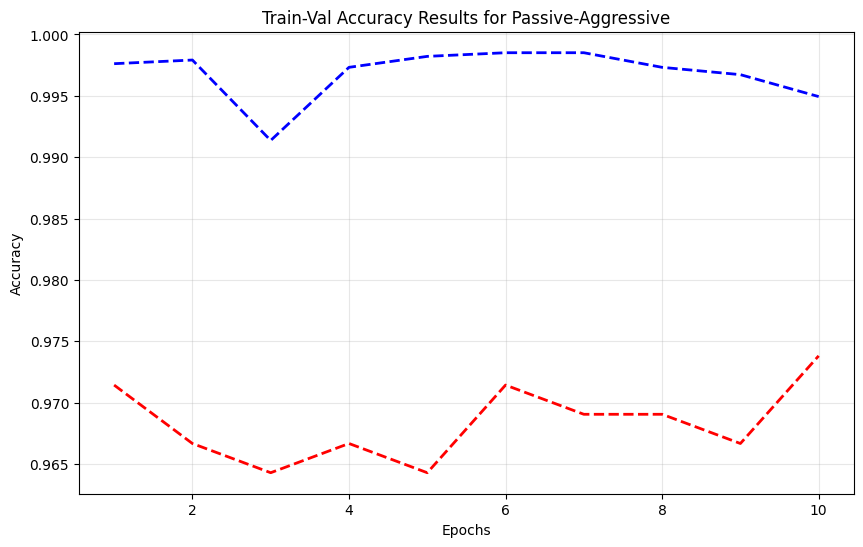

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9595238095238096, 'weighted_precision': 0.9594373797498799, 'wighted_recall': 0.9595238095238096, 'weighted_f1': 0.9593248529953847, 'macro_precision': 0.9581755050505051, 'macro_recall': 0.9492533078847591, 'macro_f1': 0.95351532236538, 'roc_auc': 0.9492533078847591}, 'confusion_matrix': array([[277,   6],
       [ 11, 126]], dtype=int64), 'epochs': 10}


Begin MLPClassifier
K-nearest Neighbors begins epoch 10
KNeighborsClassifier classification report


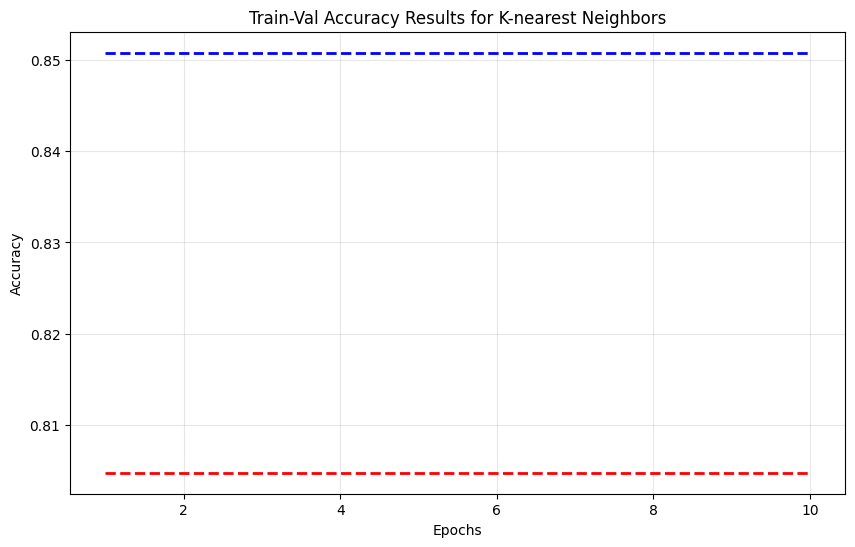

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.8, 'weighted_precision': 0.8672490073737947, 'wighted_recall': 0.8, 'weighted_f1': 0.8061754843517139, 'macro_precision': 0.8043108338060125, 'macro_recall': 0.8459415542544686, 'macro_f1': 0.7946162444113264, 'roc_auc': 0.8459415542544685}, 'confusion_matrix': array([[202,  81],
       [  3, 134]], dtype=int64), 'epochs': 10}


Begin ExtraTreesClassifier
SVM begins epoch 10
SVC classification report


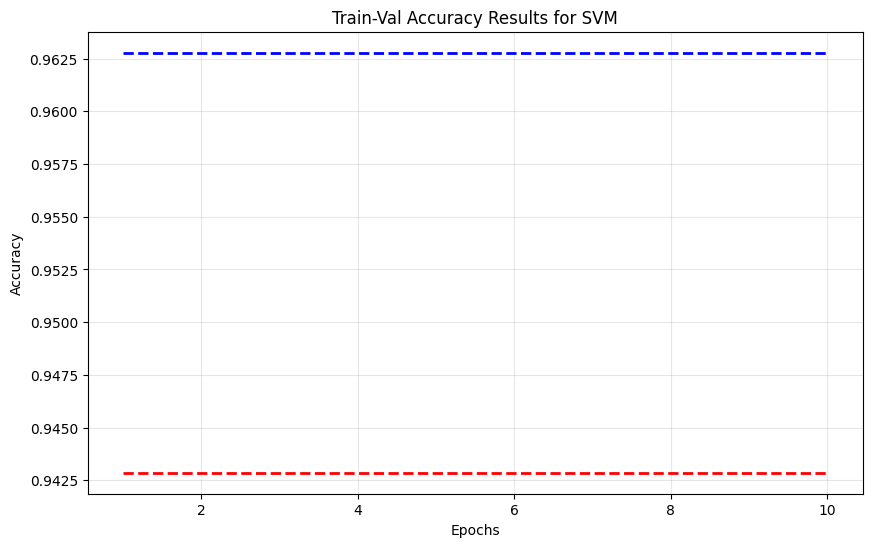

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9261904761904762, 'weighted_precision': 0.9321903405236739, 'wighted_recall': 0.9261904761904762, 'weighted_f1': 0.9236208769221974, 'macro_precision': 0.9472934472934473, 'macro_recall': 0.8887441644528127, 'macro_f1': 0.9106842737094838, 'roc_auc': 0.8887441644528127}, 'confusion_matrix': array([[282,   1],
       [ 30, 107]], dtype=int64), 'epochs': 10}


Begin XGBClassifier
XGBoost Classifier begins epoch 5
XGBoost Classifier begins epoch 10
XGBClassifier classification report


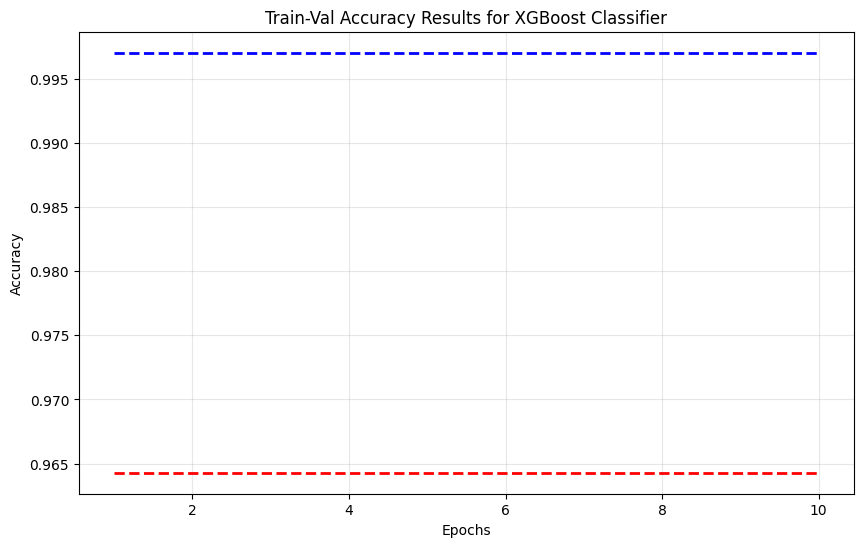

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'XGBoost Classifier', 'type': 'normal', 'metrics': {'accuracy': 0.9666666666666667, 'weighted_precision': 0.9665886939571151, 'wighted_recall': 0.9666666666666667, 'weighted_f1': 0.9666028030930682, 'macro_precision': 0.9637426900584796, 'macro_recall': 0.9602022129942482, 'macro_f1': 0.9619407622203812, 'roc_auc': 0.9602022129942482}, 'confusion_matrix': array([[277,   6],
       [  8, 129]], dtype=int64), 'epochs': 10}


Extra Trees Classifier begins epoch 5
Extra Trees Classifier begins epoch 10
ExtraTreesClassifier classification report


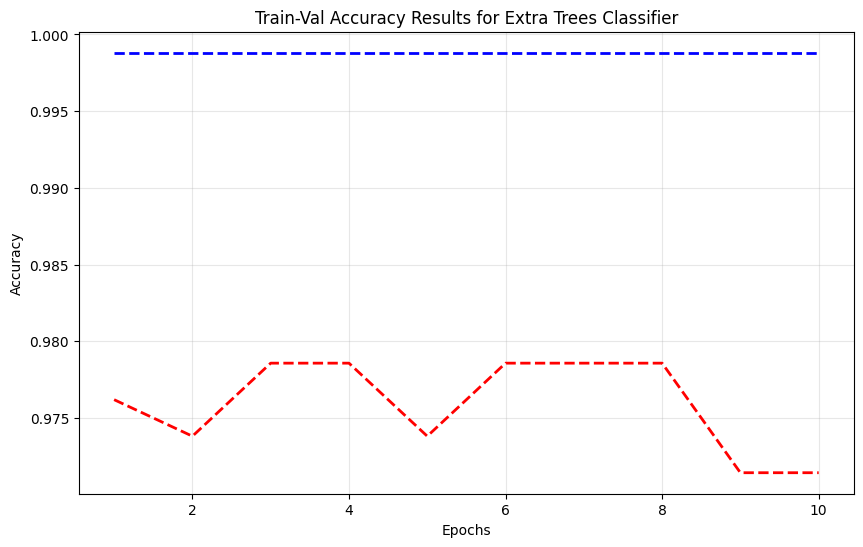

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Extra Trees Classifier', 'type': 'normal', 'metrics': {'accuracy': 0.9833333333333333, 'weighted_precision': 0.9833515986501062, 'wighted_recall': 0.9833333333333333, 'weighted_f1': 0.9832850191419313, 'macro_precision': 0.983796054691577, 'macro_recall': 0.9782182559129247, 'macro_f1': 0.9809337284936998, 'roc_auc': 0.9782182559129247}, 'confusion_matrix': array([[281,   2],
       [  5, 132]], dtype=int64), 'epochs': 10}


Multi-layer Perceptron begins epoch 5
Multi-layer Perceptron begins epoch 10
MLPClassifier classification report


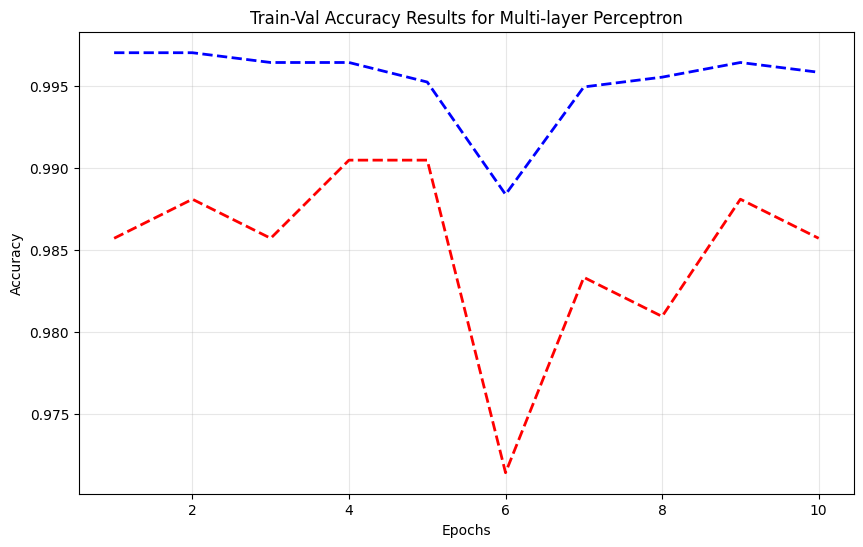

{'dataset': 'spam_assassin_lemmatized_countvec', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9857142857142858, 'weighted_precision': 0.9858085981504284, 'wighted_recall': 0.9857142857142858, 'weighted_f1': 0.9856585909217489, 'macro_precision': 0.9875298001100312, 'macro_recall': 0.9799850403652215, 'macro_f1': 0.9836257309941521, 'roc_auc': 0.9799850403652215}, 'confusion_matrix': array([[282,   1],
       [  5, 132]], dtype=int64), 'epochs': 10}




In [10]:
train_and_evaluate_models(
    spam_assassin_lemmatizing_countvec, 
    csv_file["Is_spam"], 
    "spam_assassin_lemmatized_countvec",
    metric_results,
    mode="epochs",
    test_size=0.1,
    valid_size=0.1)

del spam_assassin_lemmatizing_countvec

## Lemmatizing + TF-IDF Vectorizer

In [11]:
spam_assassin_lemmatizing_tfidf = preprocessing.vectorizing(spam_assassin_lemmatizing, "tfidf")

Threading avaiable
Begin SVC
Begin MultinomialNB
Begin BernoulliNB
Multinomial Naive Bayes begins epoch 5
Bernoulli Naive Bayes begins epoch 5
Multinomial Naive Bayes begins epoch 10
MultinomialNB classification report


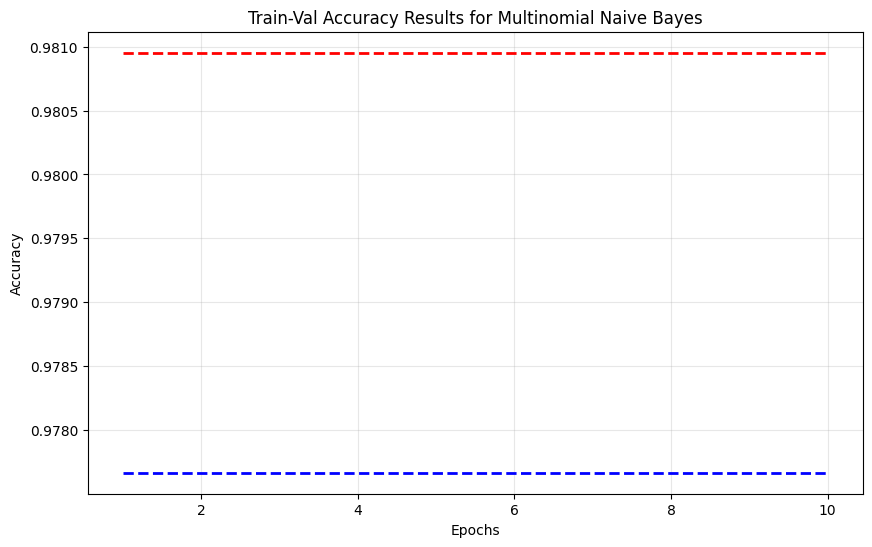

Bernoulli Naive Bayes begins epoch 10
{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9547619047619048, 'weighted_precision': 0.9556861585087392, 'wighted_recall': 0.9547619047619048, 'weighted_f1': 0.9541431397961682, 'macro_precision': 0.9608761987794245, 'macro_recall': 0.936305486059168, 'macro_f1': 0.9471939332578961, 'roc_auc': 0.936305486059168}, 'confusion_matrix': array([[280,   3],
       [ 16, 121]], dtype=int64), 'epochs': 10}


Begin RandomForestClassifier
BernoulliNB classification report


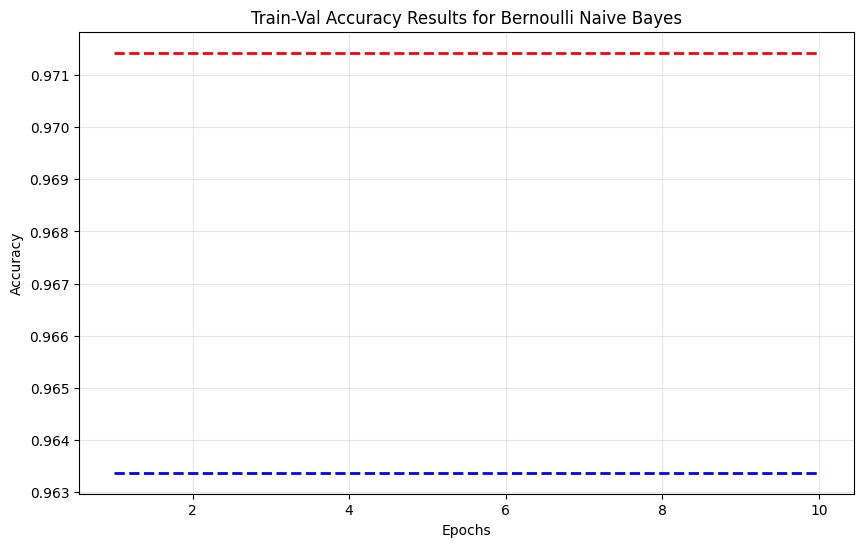

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}


Begin DecisionTreeClassifier
Decision Tree begins epoch 5
Decision Tree begins epoch 10
DecisionTreeClassifier classification report


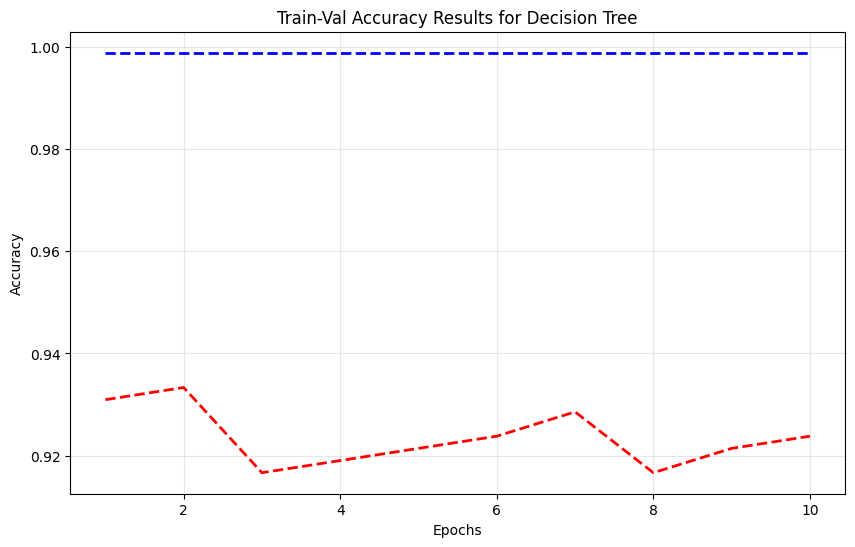

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9452380952380952, 'weighted_precision': 0.9453522605465251, 'wighted_recall': 0.9452380952380952, 'weighted_f1': 0.9452892004750411, 'macro_precision': 0.937018193031144, 'macro_recall': 0.9386526011709784, 'macro_f1': 0.9378278358809332, 'roc_auc': 0.9386526011709784}, 'confusion_matrix': array([[271,  12],
       [ 11, 126]], dtype=int64), 'epochs': 10}


Begin AdaBoostClassifier
Random Forest begins epoch 5
AdaBoost begins epoch 5
SVM begins epoch 5
Random Forest begins epoch 10
RandomForestClassifier classification report


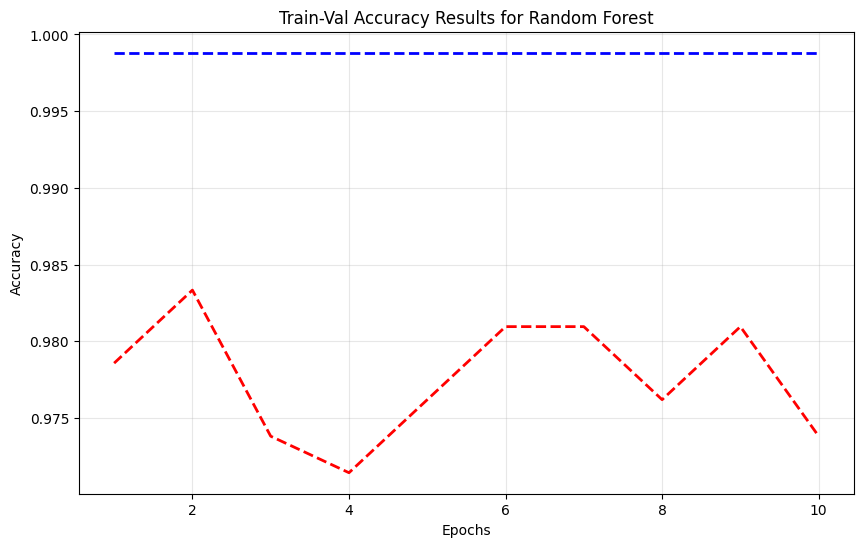

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9880952380952381, 'weighted_precision': 0.9880853749950684, 'wighted_recall': 0.9880952380952381, 'weighted_f1': 0.9880839325283769, 'macro_precision': 0.9873653686826844, 'macro_recall': 0.9855175259859172, 'macro_f1': 0.986433319766653, 'roc_auc': 0.9855175259859172}, 'confusion_matrix': array([[281,   2],
       [  3, 134]], dtype=int64), 'epochs': 10}


Begin LogisticRegression
AdaBoost begins epoch 10
Logistic Regression begins epoch 5
AdaBoostClassifier classification report


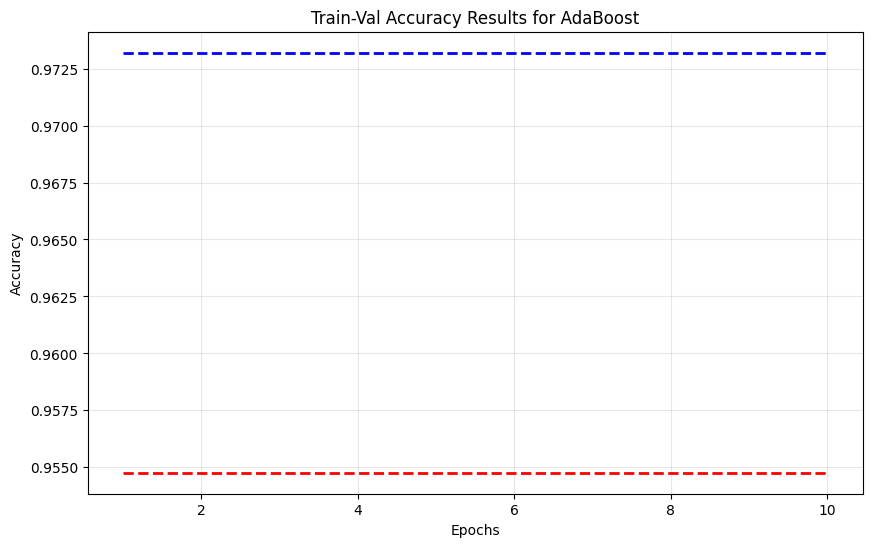

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9405991659691938, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9405317396467839, 'macro_precision': 0.9316219549799569, 'macro_recall': 0.9332361816821851, 'macro_f1': 0.9324215607401448, 'roc_auc': 0.9332361816821853}, 'confusion_matrix': array([[270,  13],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin KNeighborsClassifier
Logistic Regression begins epoch 10
LogisticRegression classification report


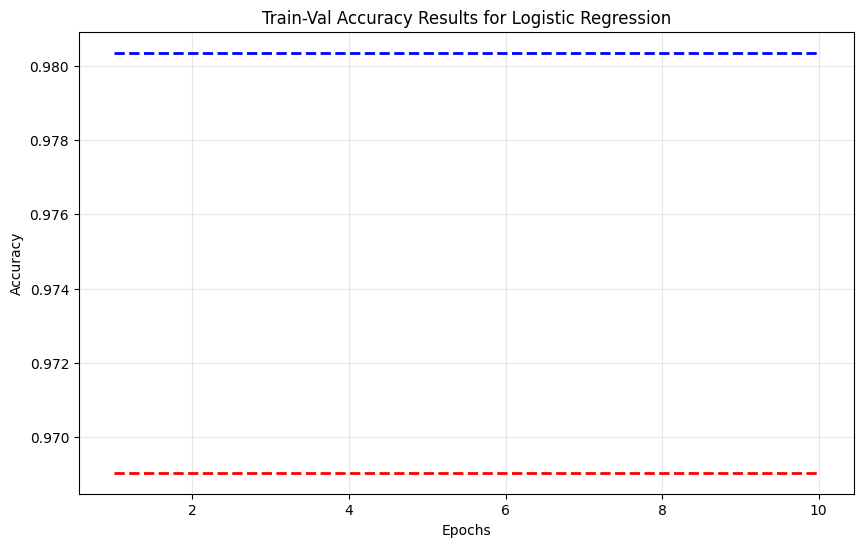

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9547619047619048, 'weighted_precision': 0.9568531746031746, 'wighted_recall': 0.9547619047619048, 'weighted_f1': 0.9539252637336479, 'macro_precision': 0.9658333333333333, 'macro_recall': 0.9325397848907688, 'macro_f1': 0.946739993726265, 'roc_auc': 0.9325397848907688}, 'confusion_matrix': array([[282,   1],
       [ 18, 119]], dtype=int64), 'epochs': 10}


Begin SGDClassifier
Stochastic Gradient Descent begins epoch 5
Stochastic Gradient Descent begins epoch 10
SGDClassifier classification report


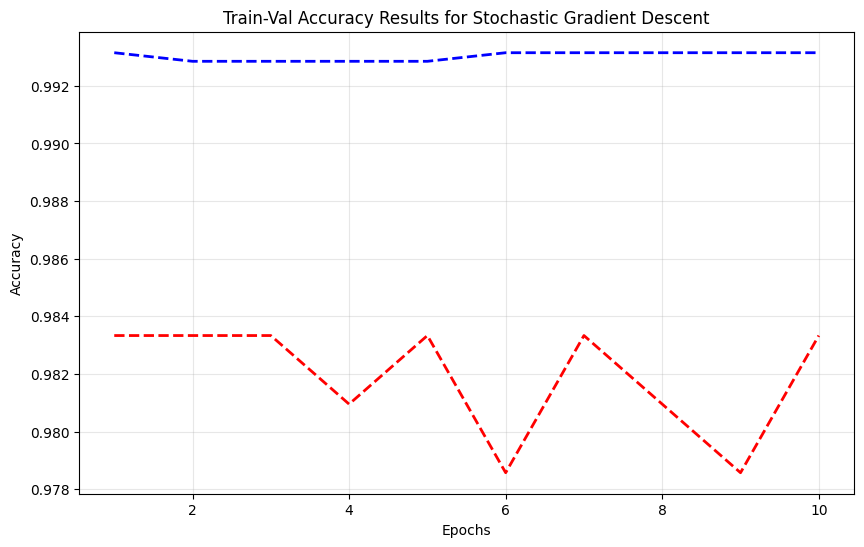

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9725907990314769, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9710708531279598, 'macro_precision': 0.9796610169491525, 'macro_recall': 0.9562043795620438, 'macro_f1': 0.966718613803851, 'roc_auc': 0.9562043795620438}, 'confusion_matrix': array([[283,   0],
       [ 12, 125]], dtype=int64), 'epochs': 10}


Begin Perceptron
Perceptron begins epoch 5
Perceptron begins epoch 10
Perceptron classification report


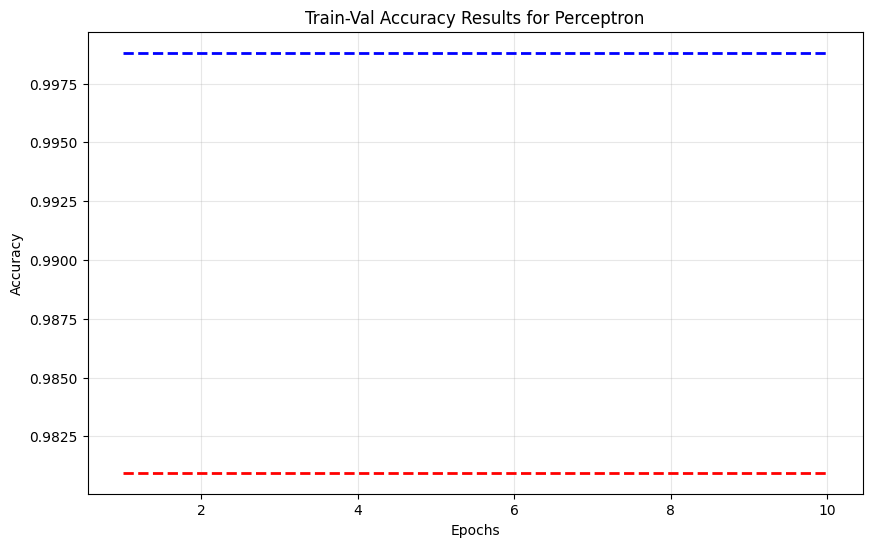

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9880952380952381, 'weighted_precision': 0.9880853749950684, 'wighted_recall': 0.9880952380952381, 'weighted_f1': 0.9880839325283769, 'macro_precision': 0.9873653686826844, 'macro_recall': 0.9855175259859172, 'macro_f1': 0.986433319766653, 'roc_auc': 0.9855175259859172}, 'confusion_matrix': array([[281,   2],
       [  3, 134]], dtype=int64), 'epochs': 10}


Begin PassiveAggressiveClassifier
Passive-Aggressive begins epoch 5
Passive-Aggressive begins epoch 10
PassiveAggressiveClassifier classification report


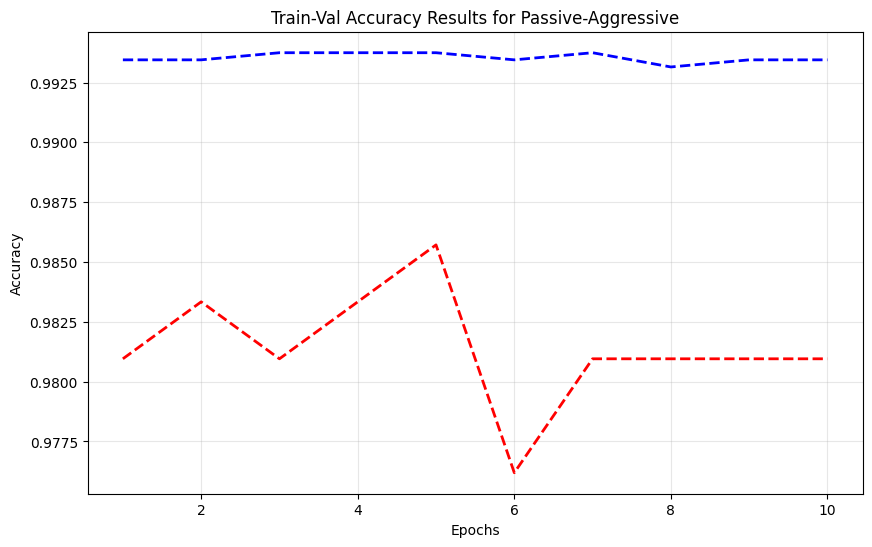

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.969047619047619, 'weighted_precision': 0.9704070141570141, 'wighted_recall': 0.969047619047619, 'weighted_f1': 0.9686242535447467, 'macro_precision': 0.9780405405405406, 'macro_recall': 0.9525547445255474, 'macro_f1': 0.9638695332817184, 'roc_auc': 0.9525547445255474}, 'confusion_matrix': array([[283,   0],
       [ 13, 124]], dtype=int64), 'epochs': 10}


Begin MLPClassifier
SVM begins epoch 10
SVC classification report


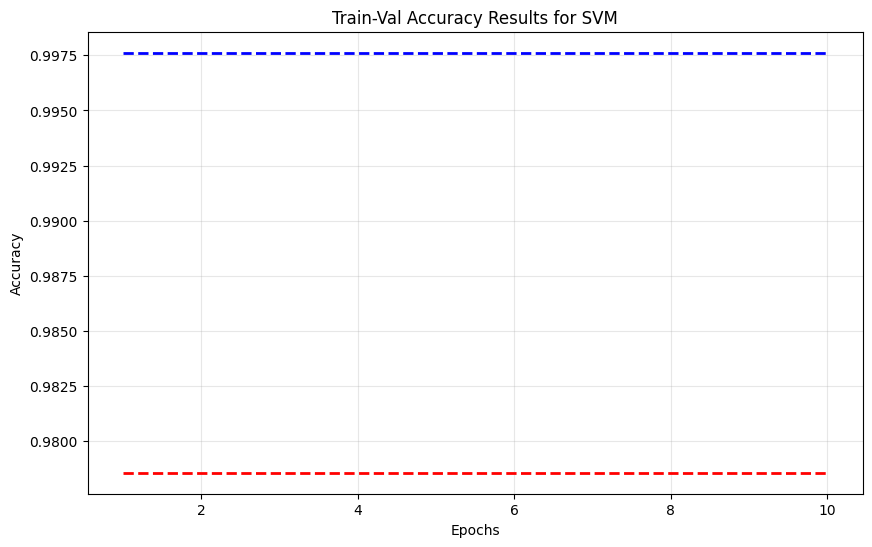

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9761904761904762, 'weighted_precision': 0.9770030879245897, 'wighted_recall': 0.9761904761904762, 'weighted_f1': 0.9759462181337183, 'macro_precision': 0.9829351535836177, 'macro_recall': 0.9635036496350364, 'macro_f1': 0.9723800505050506, 'roc_auc': 0.9635036496350364}, 'confusion_matrix': array([[283,   0],
       [ 10, 127]], dtype=int64), 'epochs': 10}


Begin ExtraTreesClassifier
K-nearest Neighbors begins epoch 5
Extra Trees Classifier begins epoch 5
Multi-layer Perceptron begins epoch 5
K-nearest Neighbors begins epoch 10
KNeighborsClassifier classification report


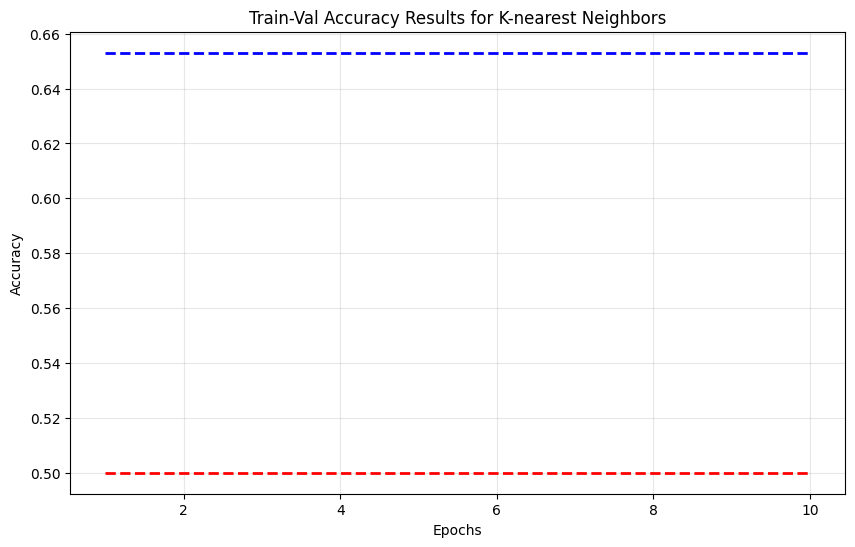

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.5142857142857142, 'weighted_precision': 0.8048596564725597, 'wighted_recall': 0.5142857142857142, 'weighted_f1': 0.4810731375469349, 'macro_precision': 0.7008797653958945, 'macro_recall': 0.6395759717314488, 'macro_f1': 0.5048429228599829, 'roc_auc': 0.6395759717314488}, 'confusion_matrix': array([[ 79, 204],
       [  0, 137]], dtype=int64), 'epochs': 10}


Begin XGBClassifier
Extra Trees Classifier begins epoch 10
XGBoost Classifier begins epoch 5
ExtraTreesClassifier classification report


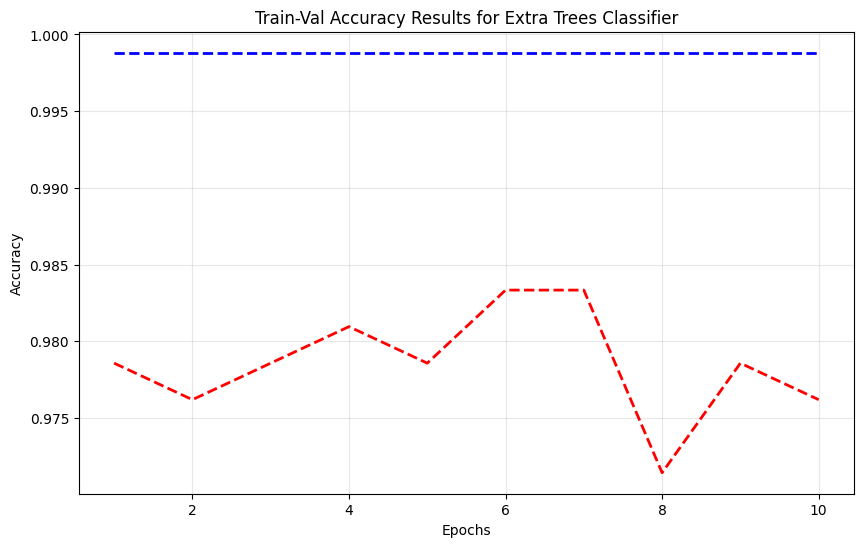

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Extra Trees Classifier', 'type': 'normal', 'metrics': {'accuracy': 0.9904761904761905, 'weighted_precision': 0.9906089264974282, 'wighted_recall': 0.9904761904761905, 'weighted_f1': 0.9904390606144992, 'macro_precision': 0.9930313588850175, 'macro_recall': 0.9854014598540146, 'macro_f1': 0.989083820662768, 'roc_auc': 0.9854014598540146}, 'confusion_matrix': array([[283,   0],
       [  4, 133]], dtype=int64), 'epochs': 10}


XGBoost Classifier begins epoch 10
XGBClassifier classification report


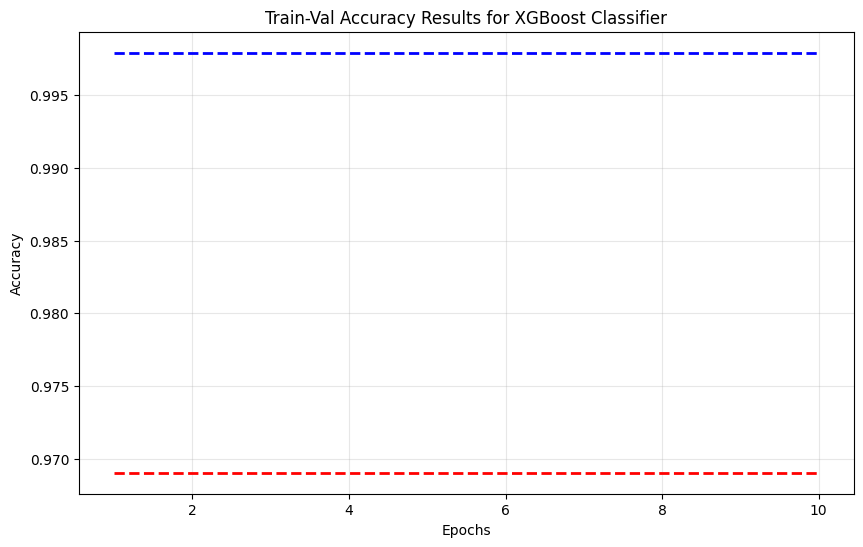

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'XGBoost Classifier', 'type': 'normal', 'metrics': {'accuracy': 0.9666666666666667, 'weighted_precision': 0.9666072847624289, 'wighted_recall': 0.9666666666666667, 'weighted_f1': 0.9665367121507472, 'macro_precision': 0.9655235650100862, 'macro_recall': 0.9583193624100488, 'macro_f1': 0.9617933723196881, 'roc_auc': 0.9583193624100488}, 'confusion_matrix': array([[278,   5],
       [  9, 128]], dtype=int64), 'epochs': 10}


Multi-layer Perceptron begins epoch 10
MLPClassifier classification report


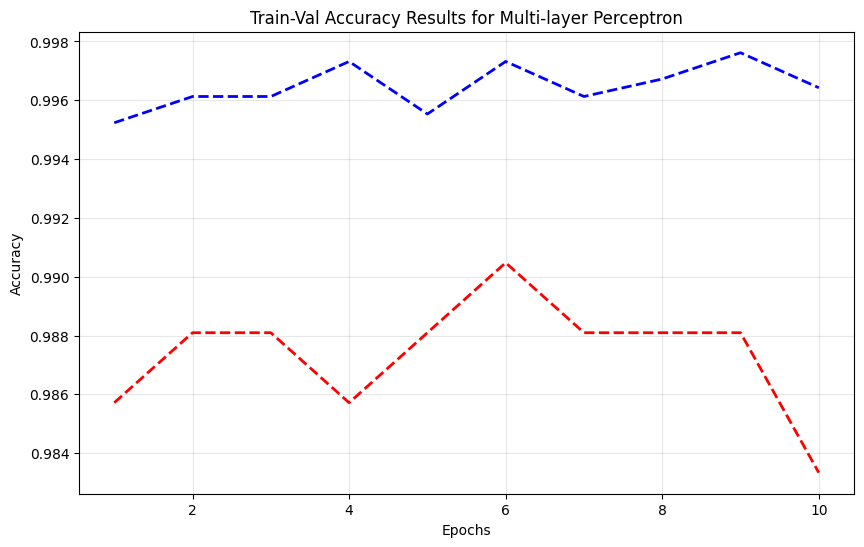

{'dataset': 'spam_assassin_lemmatized_tfidf', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9880952380952381, 'weighted_precision': 0.9881301117425078, 'wighted_recall': 0.9880952380952381, 'weighted_f1': 0.9881063479293568, 'macro_precision': 0.9855843354918286, 'macro_recall': 0.9874003765701169, 'macro_f1': 0.9864843121480289, 'roc_auc': 0.9874003765701168}, 'confusion_matrix': array([[280,   3],
       [  2, 135]], dtype=int64), 'epochs': 10}




In [12]:
train_and_evaluate_models(
    spam_assassin_lemmatizing_tfidf, 
    csv_file["Is_spam"], 
    "spam_assassin_lemmatized_tfidf",
    metric_results,
    mode="epochs",
    test_size=0.1,
    valid_size=0.1)

del spam_assassin_lemmatizing_tfidf

In [13]:
print(metric_results)

def convert(dic):
    dic["confusion_matrix"] = dic["confusion_matrix"].tolist()
    return dic

metric_results = list(map(convert, metric_results))

add_to_json_array("./spam_assassin_classification_report.json", metric_results, mode="overwrite")

[{'dataset': 'spam_assassin_stemming_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9404761904761905, 'weighted_precision': 0.9419603174603175, 'wighted_recall': 0.9404761904761905, 'weighted_f1': 0.9393753470179577, 'macro_precision': 0.9483333333333334, 'macro_recall': 0.9162905264243894, 'macro_f1': 0.9299210443766643, 'roc_auc': 0.9162905264243892}, 'confusion_matrix': array([[279,   4],
       [ 21, 116]], dtype=int64), 'epochs': 10}, {'dataset': 'spam_assassin_stemming_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9571428571428572, 'weighted_precision': 0.9572555018970748, 'wighted_recall': 0.9571428571428572, 'weighted_f1': 0.9567970448770009, 'macro_precision': 0.9582833852793096, 'macro_recall': 0.9437208222640634, 'macro_f1': 0.9504859710251239, 'roc_auc': 0.9437208222640634}, 'confusion_matrix': array([[278,   5],
       [ 13, 124]], dtype=int64), 'epochs': 10}, {'dataset': 'spam_assassin_